In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

In [2]:
#Loading Data

dataset = pd.read_excel('Company_x.xlsx')
df = dataset.copy()

In [3]:
df.head()

EntityID OriginalCreditor[Redacted]  AccountID  CurrentBalance  \
0       932                 Creditor 1       3677             0.0   
1       160                 Creditor 2       4276           182.9   
2       932                 Creditor 1       8525             0.0   
3       160                 Creditor 2       9859          8279.5   
4       932                 Creditor 1      12807             0.0   

   DebtLoadPrincipal  Balanaceatdebt_load  PurchasePrice ProductOrDebtType  \
0            1160.20              1160.20           4.22             Other   
1             182.90               182.90           4.22             Other   
2             538.57               538.57           4.22             Other   
3            8279.50              8279.50           4.22             Other   
4             523.00               523.00           4.22             Other   

      CollectionStatus ClosureReason  ... LastPaymentMethod NumLiableParties  \
0         PAID_IN_FULL           NaN  ...            Cheque              1.0   
1  CANCELLED_WITHDRAWN           NaN  ...               NaN              1.0   
2         PAID_IN_FULL           NaN  ...            Cheque              1.0   
3              PASSIVE           NaN  ...               NaN              1.0   
4         PAID_IN_FULL           NaN  ...            Cheque              1.0   

  CustomerAge NumPhones  NumEmails NumAddresses  IsStatBarred  Unnamed: 22  \
0        53.0         0          0            1             N          NaN   
1         NaN         0          0            1             Y          NaN   
2         NaN         1          0            1             N          NaN   
3         NaN         1          0            1             Y          NaN   
4        46.0         2          0            1             Y          NaN   

   Unnamed: 23  Unnamed: 24  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 25 columns]

In [4]:
#Data Verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   Balanaceatdebt_load         406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   ClosureReason               9030 non-null    object 
 10  InBankruptcy                406423 non-null  object 
 11  AccountInsolvencyType       285 non-null     object 
 12  CustomerInsolvencyType      8531 non-null    object 
 13  IsLegal       

In [5]:
#drop unwanted columns(EntityID,AccountID) as it is Unqiue numbers

df.drop(['EntityID', 'AccountID'], axis=1, inplace=True)

# Assuming your DataFrame is named df
df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)

In [6]:
df.rename(columns={'OriginalCreditor[Redacted]' : 'OriginalCreditor_Redacted'}, inplace=True)

In [7]:
#Data description for Numerical data

df.describe().T

count         mean          std      min      25%  \
CurrentBalance       406423.0  1301.866266  4030.513710 -7717.20   85.330   
DebtLoadPrincipal    406423.0  1539.010928  4416.229311     0.00  246.970   
Balanaceatdebt_load  406423.0  1600.933847  4531.889319     0.00  249.875   
PurchasePrice        403731.0     5.618606     5.441934     0.19    3.070   
LastPaymentAmount    103977.0   283.896947  1119.842219     0.01   20.000   
NumLiableParties     406301.0     1.017145     0.132866     1.00    1.000   
CustomerAge          376941.0    45.728061    12.950395   -41.00   36.000   
NumPhones            406423.0     0.435652     0.714852     0.00    0.000   
NumEmails            406423.0     0.208113     0.434321     0.00    0.000   
NumAddresses         406423.0     0.847354     0.459690     0.00    1.000   

                        50%       75%        max  
CurrentBalance       457.51  1159.365  441681.52  
DebtLoadPrincipal    619.00  1393.780  844343.00  
Balanaceatdebt_load  630.74  1433.755  844343.00  
PurchasePrice          4.22     6.590      52.18  
LastPaymentAmount     40.00   142.900   73131.84  
NumLiableParties       1.00     1.000       4.00  
CustomerAge           44.00    54.000     133.00  
NumPhones              0.00     1.000       8.00  
NumEmails              0.00     0.000       5.00  
NumAddresses           1.00     1.000       7.00

In [8]:
#Data description for Categorical data

df.describe(include=object).T

count unique                      top    freq
OriginalCreditor_Redacted  406423     52              Creditor 17   84768
ProductOrDebtType          406423     10  Utilities/Telco - Other  212158
CollectionStatus           406423     12                   ACTIVE  169489
ClosureReason                9030     14                Insolvent    5634
InBankruptcy               406423      2                        N  398270
AccountInsolvencyType         285      5          LIQUIDATION_NOP     161
CustomerInsolvencyType       8531     13                 BANKRUPT    3809
IsLegal                    406423      2                        N  396709
LastPaymentMethod          103977      9                   Cheque   54154
IsStatBarred               406423      2                        Y  284548

In [9]:
#Data Cleaning & Pre-processing
#Checking missing values

df.isnull().sum()

OriginalCreditor_Redacted         0
CurrentBalance                    0
DebtLoadPrincipal                 0
Balanaceatdebt_load               0
PurchasePrice                  2692
ProductOrDebtType                 0
CollectionStatus                  0
ClosureReason                397393
InBankruptcy                      0
AccountInsolvencyType        406138
CustomerInsolvencyType       397892
IsLegal                           0
LastPaymentAmount            302446
LastPaymentMethod            302446
NumLiableParties                122
CustomerAge                   29482
NumPhones                         0
NumEmails                         0
NumAddresses                      0
IsStatBarred                      0
dtype: int64

In [10]:
df.isnull().sum()/len(df) * 100

OriginalCreditor_Redacted     0.000000
CurrentBalance                0.000000
DebtLoadPrincipal             0.000000
Balanaceatdebt_load           0.000000
PurchasePrice                 0.662364
ProductOrDebtType             0.000000
CollectionStatus              0.000000
ClosureReason                97.778177
InBankruptcy                  0.000000
AccountInsolvencyType        99.929876
CustomerInsolvencyType       97.900955
IsLegal                       0.000000
LastPaymentAmount            74.416556
LastPaymentMethod            74.416556
NumLiableParties              0.030018
CustomerAge                   7.254019
NumPhones                     0.000000
NumEmails                     0.000000
NumAddresses                  0.000000
IsStatBarred                  0.000000
dtype: float64

In [11]:
#Age cannot be negative, Convert CustomerAge into positive

df[df['CustomerAge'] < 0]

OriginalCreditor_Redacted  CurrentBalance  DebtLoadPrincipal  \
9029                  Creditor 7            0.00              36.37   
11172                 Creditor 7            0.00              36.00   
15502                 Creditor 7            0.00              53.00   
15609                 Creditor 7           47.65              38.00   
22293                Creditor 11            0.00            1181.42   
23433                 Creditor 7            0.00              80.00   
23983                Creditor 10           18.16             662.69   
24652                Creditor 10            0.00             104.83   
24724                Creditor 10            0.00            4780.00   
25313                Creditor 10            0.00             343.90   
26301                Creditor 10            0.00             400.30   
26365                Creditor 10            0.00            4690.36   
26507                Creditor 10            0.00             598.45   
27900                 Creditor 7           17.26              45.00   
32566                 Creditor 7            0.00              65.00   
33029                 Creditor 7            0.00              65.00   
40723                 Creditor 7            0.00              55.00   
134727               Creditor 25          373.73             373.73   
180047               Creditor 33          485.00             485.00   
247888                Creditor 6            0.00            1960.59   

        Balanaceatdebt_load  PurchasePrice        ProductOrDebtType  \
9029                  46.00           4.22                    Other   
11172                 45.29           4.22                    Other   
15502                 65.29           4.22                    Other   
15609                 47.65           4.22                    Other   
22293               1181.42           4.22                    Other   
23433                 97.06           4.22                    Other   
23983                808.16           4.96                    Other   
24652                127.84           4.96                    Other   
24724               5829.27           4.96                    Other   
25313                419.39           4.96                    Other   
26301                488.17           4.96                    Other   
26365               5719.95           4.96                    Other   
26507                729.82           4.96                    Other   
27900                 59.38           4.22                    Other   
32566                 84.38           4.22                    Other   
33029                 84.38           4.22                    Other   
40723                 71.88           4.22                    Other   
134727               373.73          11.70                    Other   
180047               485.00           3.60  Utilities/Telco - Other   
247888              1960.59           4.22                    Other   

       CollectionStatus ClosureReason InBankruptcy AccountInsolvencyType  \
9029       PAID_IN_FULL           NaN            N                   NaN   
11172      PAID_IN_FULL           NaN            N                   NaN   
15502      PAID_IN_FULL           NaN            N                   NaN   
15609           PASSIVE           NaN            N                   NaN   
22293      PAID_IN_FULL           NaN            N                   NaN   
23433      PAID_IN_FULL           NaN            N                   NaN   
23983           PASSIVE           NaN            N                   NaN   
24652      PAID_IN_FULL           NaN            N                   NaN   
24724      PAID_IN_FULL           NaN            N                   NaN   
25313      PAID_IN_FULL           NaN            N                   NaN   
26301      PAID_IN_FULL           NaN            N                   NaN   
26365      PAID_IN_FULL           NaN            N                   NaN   
26507      PAID_IN_FULL           N

In [12]:
df['CustomerAge'] = df['CustomerAge'].abs()

In [13]:
df['CustomerAge'].describe()

count    376941.000000
mean         45.730273
std          12.942580
min           1.000000
25%          36.000000
50%          44.000000
75%          54.000000
max         133.000000
Name: CustomerAge, dtype: float64

In [14]:
#Missing Value Treatment
#ClosureReason, AccountInsolvencyType, CustomerInsolvencyType, LastPaymentAmount and LastPaymentMethod has more than 75% missing value
#Drop those columns

df = df.drop(['ClosureReason', 'AccountInsolvencyType', 'CustomerInsolvencyType', 'LastPaymentAmount', 'LastPaymentMethod'], axis=1)

In [15]:
df.head()

OriginalCreditor_Redacted  CurrentBalance  DebtLoadPrincipal  \
0                Creditor 1             0.0            1160.20   
1                Creditor 2           182.9             182.90   
2                Creditor 1             0.0             538.57   
3                Creditor 2          8279.5            8279.50   
4                Creditor 1             0.0             523.00   

   Balanaceatdebt_load  PurchasePrice ProductOrDebtType     CollectionStatus  \
0              1160.20           4.22             Other         PAID_IN_FULL   
1               182.90           4.22             Other  CANCELLED_WITHDRAWN   
2               538.57           4.22             Other         PAID_IN_FULL   
3              8279.50           4.22             Other              PASSIVE   
4               523.00           4.22             Other         PAID_IN_FULL   

  InBankruptcy IsLegal  NumLiableParties  CustomerAge  NumPhones  NumEmails  \
0            N       Y               1.0         53.0          0          0   
1            N       N               1.0          NaN          0          0   
2            N       N               1.0          NaN          1          0   
3            N       N               1.0          NaN          1          0   
4            N       Y               1.0         46.0          2          0   

   NumAddresses IsStatBarred  
0             1            N  
1             1            Y  
2             1            N  
3             1            Y  
4             1            Y

In [16]:
#filling missing values with Median

df['PurchasePrice'] = df['PurchasePrice'].fillna(df['PurchasePrice'].median())

df['NumLiableParties'] = df['NumLiableParties'].fillna(df['NumLiableParties'].median())

df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].median())

In [17]:
df.isnull().sum()

OriginalCreditor_Redacted    0
CurrentBalance               0
DebtLoadPrincipal            0
Balanaceatdebt_load          0
PurchasePrice                0
ProductOrDebtType            0
CollectionStatus             0
InBankruptcy                 0
IsLegal                      0
NumLiableParties             0
CustomerAge                  0
NumPhones                    0
NumEmails                    0
NumAddresses                 0
IsStatBarred                 0
dtype: int64

In [18]:
#Checking and dropping duplicate records
df[df.duplicated()]

OriginalCreditor_Redacted  CurrentBalance  DebtLoadPrincipal  \
168                   Creditor 5            0.00               0.00   
236                   Creditor 7           23.00              20.70   
272                   Creditor 7           20.00              18.00   
283                   Creditor 7           23.00              20.70   
294                   Creditor 7           45.00              40.50   
...                          ...             ...                ...   
357599               Creditor 48         1316.88            1197.16   
357799               Creditor 48          939.47             854.06   
357822               Creditor 48          240.55             218.68   
397085               Creditor 50         2205.14            2177.83   
402849               Creditor 50            0.00            4146.71   

        Balanaceatdebt_load  PurchasePrice        ProductOrDebtType  \
168                    0.00           4.22                    Other   
236                   23.00           4.22                    Other   
272                   20.00           4.22                    Other   
283                   23.00           4.22                    Other   
294                   45.00           4.22                    Other   
...                     ...            ...                      ...   
357599              1197.16           5.72  Utilities/Telco - Other   
357799               854.06           5.72  Utilities/Telco - Other   
357822               218.68           5.72  Utilities/Telco - Other   
397085              2177.83           7.38  Finance Company - Other   
402849              4146.71           7.38  Finance Company - Other   

        CollectionStatus InBankruptcy IsLegal  NumLiableParties  CustomerAge  \
168         PAID_IN_FULL            N       N               1.0         44.0   
236              PASSIVE            N       N               1.0         47.0   
272              PASSIVE            N       N               1.0         28.0   
283              PASSIVE            N       N               1.0         52.0   
294              PASSIVE            N       N               1.0         45.0   
...                  ...          ...     ...               ...          ...   
357599            ACTIVE            N       N               1.0         28.0   
357799            ACTIVE            N       N               1.0         30.0   
357822            ACTIVE            N       N               1.0         32.0   
397085            ACTIVE            N       N               2.0         44.0   
402849  SETTLED FOR LESS            N       N               2.0         44.0   

        NumPhones  NumEmails  NumAddresses IsStatBarred  
168             0          0             1            N  
236             0          0             1            Y  
272             1          0             1            Y  
283             1          0             1            Y  
294             0          0             1            Y  
...           ...        ...           ...          ...  
357599          0          0             1            Y  
357799          0          0             1            Y  
357822          0          0             1            Y  
397085          0          1             1            N  
402849          2          3             2            N  

[15757 rows x 15 columns]

In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(390666, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390666 entries, 0 to 406422
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   OriginalCreditor_Redacted  390666 non-null  object 
 1   CurrentBalance             390666 non-null  float64
 2   DebtLoadPrincipal          390666 non-null  float64
 3   Balanaceatdebt_load        390666 non-null  float64
 4   PurchasePrice              390666 non-null  float64
 5   ProductOrDebtType          390666 non-null  object 
 6   CollectionStatus           390666 non-null  object 
 7   InBankruptcy               390666 non-null  object 
 8   IsLegal                    390666 non-null  object 
 9   NumLiableParties           390666 non-null  float64
 10  CustomerAge                390666 non-null  float64
 11  NumPhones                  390666 non-null  int64  
 12  NumEmails                  390666 non-null  int64  
 13  NumAddresses               390666 

In [22]:
df['CustomerAge'].value_counts()

CustomerAge
44.0     35859
38.0     13893
37.0     13465
39.0     12994
36.0     12506
         ...  
6.0          1
7.0          1
132.0        1
115.0        1
119.0        1
Name: count, Length: 118, dtype: int64

In [23]:
df['CustomerAge'] = pd.to_numeric(df['CustomerAge'], errors='coerce')

In [24]:
df['CustomerAge'].isnull().sum()

0

In [25]:
df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].mode()[0])

In [26]:
df['CustomerAge'].value_counts()

CustomerAge
44.0     35859
38.0     13893
37.0     13465
39.0     12994
36.0     12506
         ...  
6.0          1
7.0          1
132.0        1
115.0        1
119.0        1
Name: count, Length: 118, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390666 entries, 0 to 406422
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   OriginalCreditor_Redacted  390666 non-null  object 
 1   CurrentBalance             390666 non-null  float64
 2   DebtLoadPrincipal          390666 non-null  float64
 3   Balanaceatdebt_load        390666 non-null  float64
 4   PurchasePrice              390666 non-null  float64
 5   ProductOrDebtType          390666 non-null  object 
 6   CollectionStatus           390666 non-null  object 
 7   InBankruptcy               390666 non-null  object 
 8   IsLegal                    390666 non-null  object 
 9   NumLiableParties           390666 non-null  float64
 10  CustomerAge                390666 non-null  float64
 11  NumPhones                  390666 non-null  int64  
 12  NumEmails                  390666 non-null  int64  
 13  NumAddresses               390666 

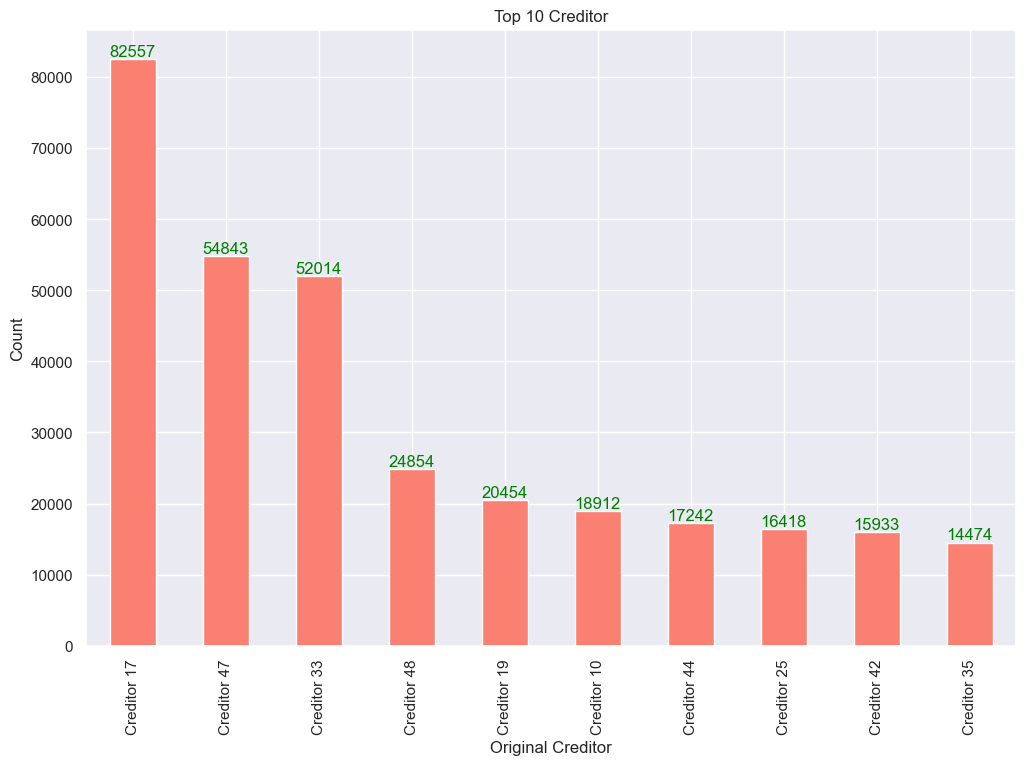

In [28]:
#EDA(Exploratory Data Analysis)

value_counts = df['OriginalCreditor_Redacted'].value_counts().head(10)

plt.figure(figsize=(12, 8))
ax = value_counts.plot(kind='bar', color='salmon')

for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', color='green')
    
plt.xlabel('Original Creditor')
plt.ylabel('Count')
plt.title('Top 10 Creditor')

plt.show()

In [29]:
OriginalCreditor_counts = df['OriginalCreditor_Redacted'].value_counts()

OriginalCreditor_frequency = {
    "Very High (>50000)": (OriginalCreditor_counts > 50000).sum(),
    "High (20000-49999)": (OriginalCreditor_counts > 20000).sum() & (OriginalCreditor_counts < 49999).sum(),
    "Average (10000-19999)": (OriginalCreditor_counts > 10000).sum() & (OriginalCreditor_counts < 19999).sum(),
    "Low (1000-9999)": (OriginalCreditor_counts >1000).sum() & (OriginalCreditor_counts < 9999).sum(),
    "Very Low": (OriginalCreditor_counts < 9999).sum()
}

OriginalCreditor_frequency

{'Very High (>50000)': 3,
 'High (20000-49999)': 1,
 'Average (10000-19999)': 12,
 'Low (1000-9999)': 8,
 'Very Low': 40}

Column: OriginalCreditor_Redacted
Value Counts:
OriginalCreditor_Redacted
Creditor 17    82557
Creditor 47    54843
Creditor 33    52014
Creditor 48    24854
Creditor 19    20454
Creditor 10    18912
Creditor 44    17242
Creditor 25    16418
Creditor 42    15933
Creditor 35    14474
Creditor 50    13238
Creditor 7     12266
Creditor 43     7441
Creditor 8      6545
Creditor 49     5682
Creditor 36     3785
Creditor 41     2763
Creditor 52     2367
Creditor 40     2281
Creditor 9      1966
Creditor 30     1459
Creditor 6      1327
Creditor 34     1325
Creditor 45     1263
Creditor 31     1168
Creditor 39      927
Creditor 51      874
Creditor 23      863
Creditor 32      858
Creditor 46      785
Creditor 18      770
Creditor 29      662
Creditor 38      633
Creditor 21      483
Creditor 28      273
Creditor 3       173
Creditor 24      159
Creditor 20      156
Creditor 37      106
Creditor 11       83
Creditor 12       82
Creditor 13       78
Creditor 27       59
Creditor 14       30
Cr

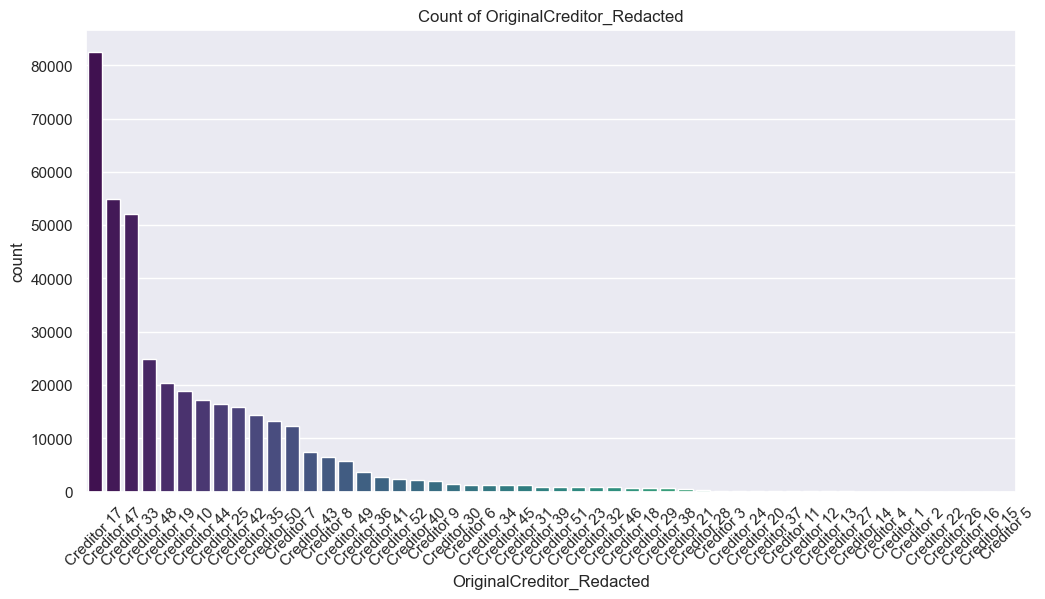


************************************************************************************************************************

Column: ProductOrDebtType
Value Counts:
ProductOrDebtType
Utilities/Telco - Other    206575
Other                       74054
Finance Company - Other     48692
Store Cards                 17699
Credit Cards                16885
Bank - Other                13030
Residential Electricity      7693
Personal Loans               4309
Loans                        1259
Hire Purchase                 470
Name: count, dtype: int64
Visualizations:


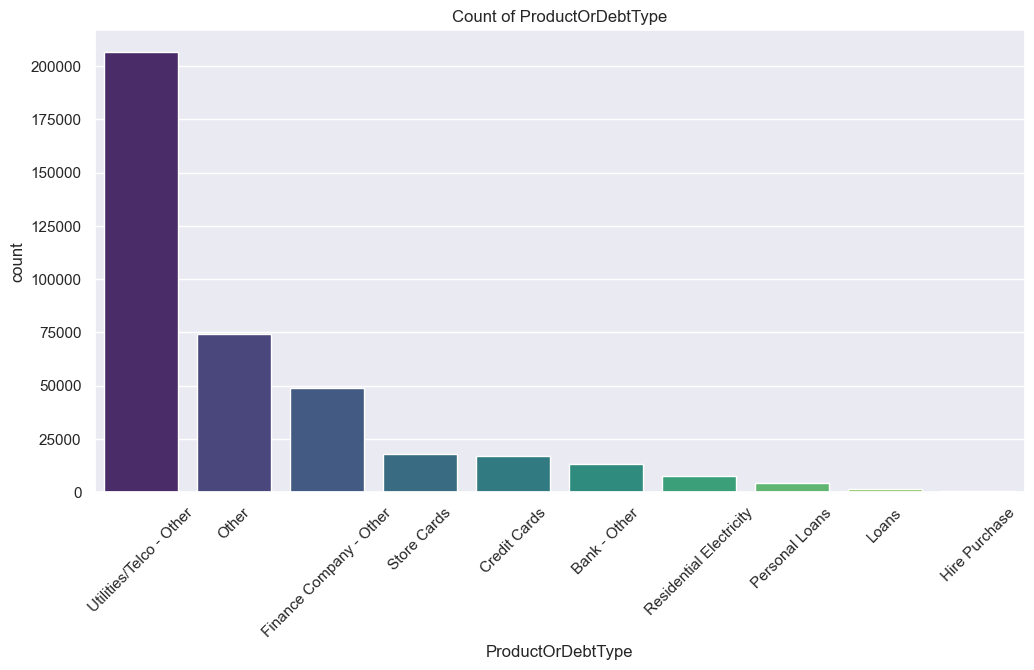


************************************************************************************************************************

Column: CollectionStatus
Value Counts:
CollectionStatus
ACTIVE                 167300
PASSIVE                128262
PAID_IN_FULL            65514
CLOSED                  13519
CANCELLED_WITHDRAWN      5401
UNDER_ARRANGEMENT        4237
SETTLED FOR LESS         4190
LEGAL                    1559
LEGAL_ARRANGEMENT         361
NON_COLLECTION            237
HOLDING                    59
PENDING                    27
Name: count, dtype: int64
Visualizations:


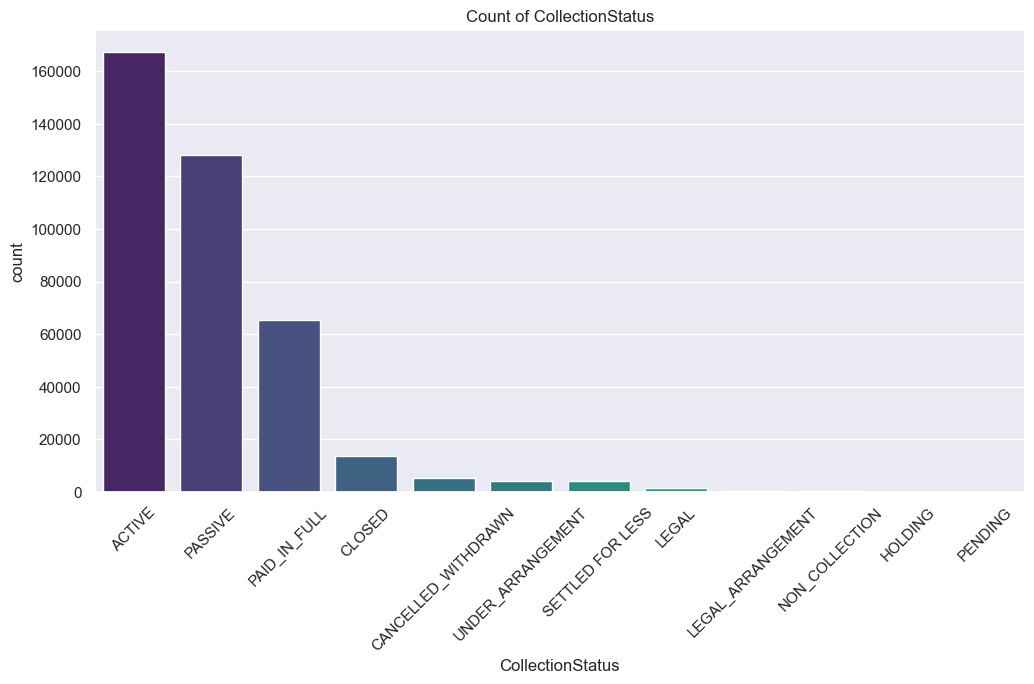


************************************************************************************************************************

Column: InBankruptcy
Value Counts:
InBankruptcy
N    382517
Y      8149
Name: count, dtype: int64
Visualizations:


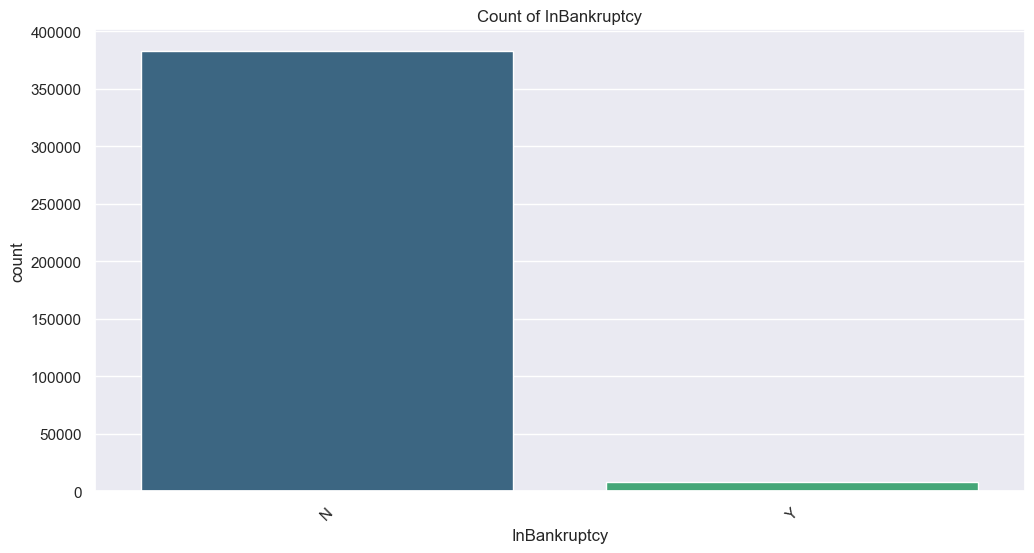


************************************************************************************************************************

Column: IsLegal
Value Counts:
IsLegal
N    380952
Y      9714
Name: count, dtype: int64
Visualizations:


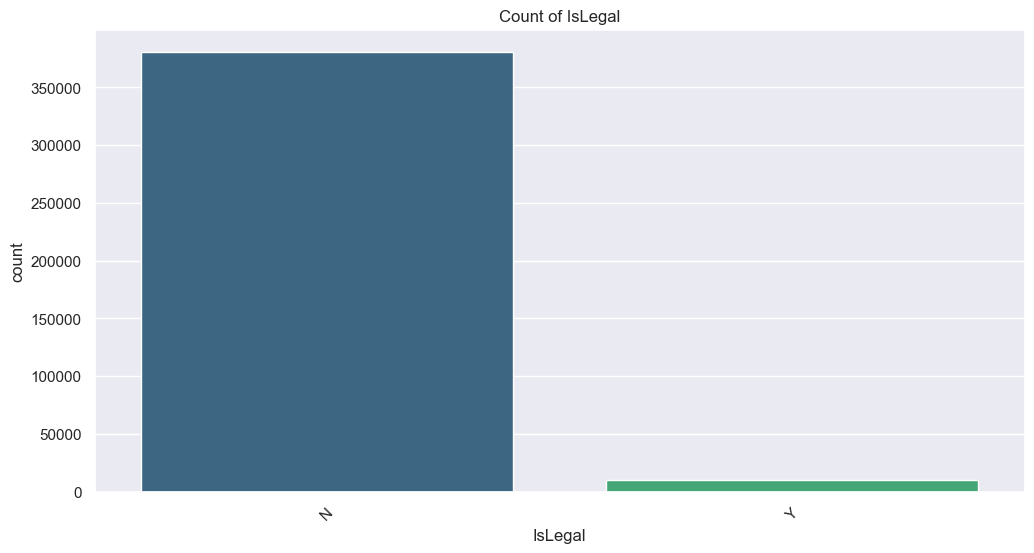


************************************************************************************************************************

Column: IsStatBarred
Value Counts:
IsStatBarred
Y    272543
N    118123
Name: count, dtype: int64
Visualizations:


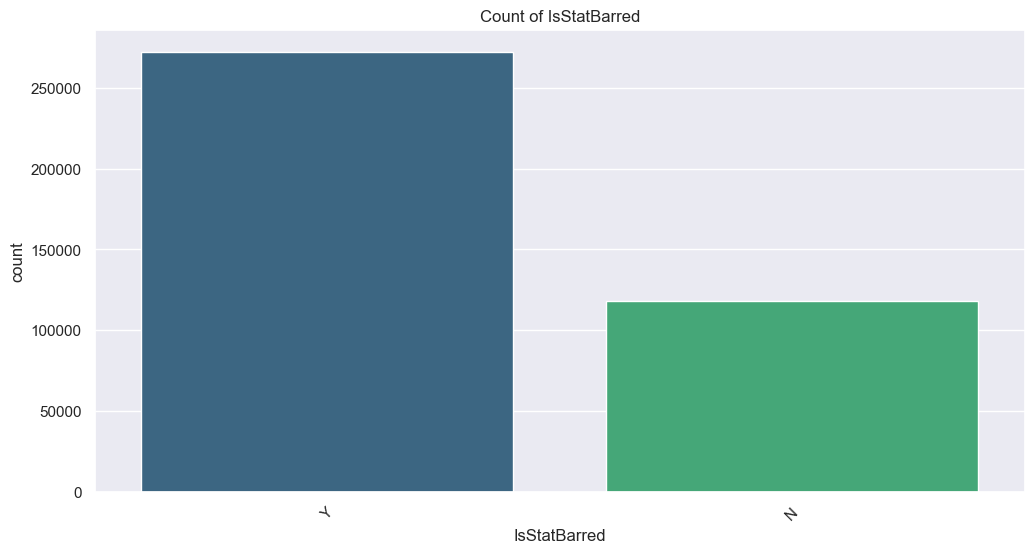


************************************************************************************************************************



In [30]:
#Visualization
# Get a list of categorical column names

categorical_columns = [col for col in df.select_dtypes(exclude='number').columns if col != ['ProductOrDebtType', 'CollectionStatus', 'IsStatBarred', 'InBankruptcy', 'IsLegal']]
for column in categorical_columns:
    
    print(f"Column: {column}")

    print("Value Counts:")
    print(df[column].value_counts())

    print("Visualizations:")

    # Bar plot for categorical data
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)
    plt.title(f"Count of {column}")
    plt.xticks(rotation=45) # Rotate x-axis labels for readability
    plt.show()

    print("\n" + "*" * 120 + "\n")

Column: CurrentBalance
Descriptive Statistics:
count    390666.000000
mean       1349.716636
std        4103.534942
min       -7717.200000
25%         111.000000
50%         491.630000
75%        1211.267500
max      441681.520000
Name: CurrentBalance, dtype: float64
Visualizations:


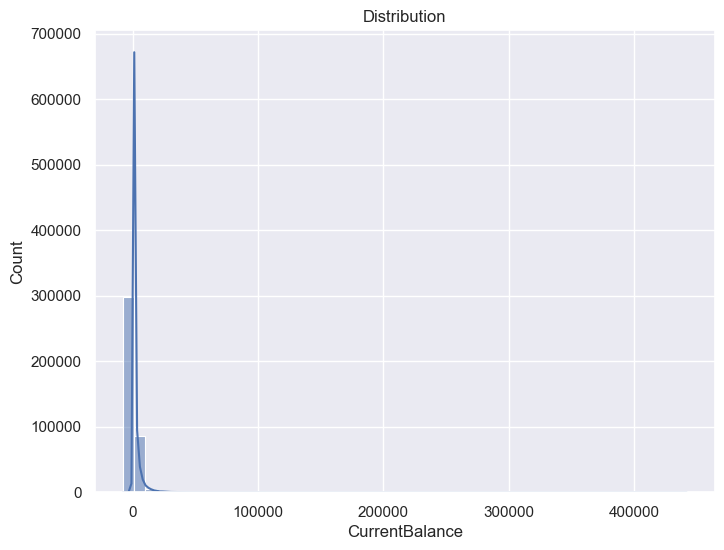

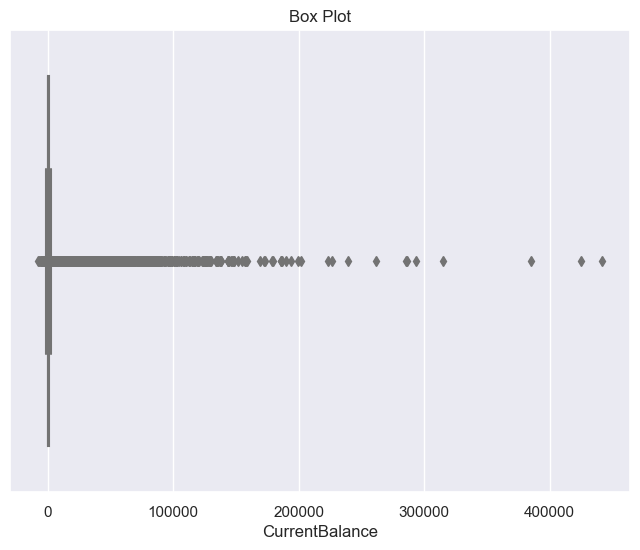


************************************************************************************************************************

Column: DebtLoadPrincipal
Descriptive Statistics:
count    390666.000000
mean       1596.144247
std        4494.739639
min           0.000000
25%         277.000000
50%         652.105000
75%        1452.387500
max      844343.000000
Name: DebtLoadPrincipal, dtype: float64
Visualizations:


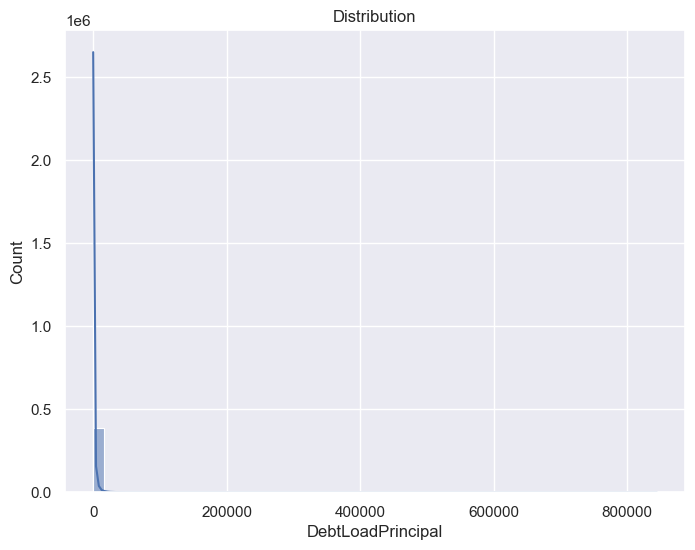

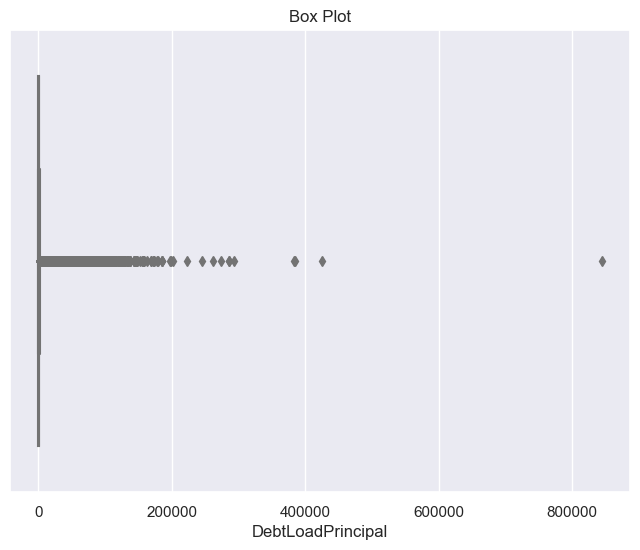


************************************************************************************************************************

Column: Balanaceatdebt_load
Descriptive Statistics:
count    390666.000000
mean       1660.329980
std        4612.207584
min           0.000000
25%         280.362500
50%         665.680000
75%        1495.152500
max      844343.000000
Name: Balanaceatdebt_load, dtype: float64
Visualizations:


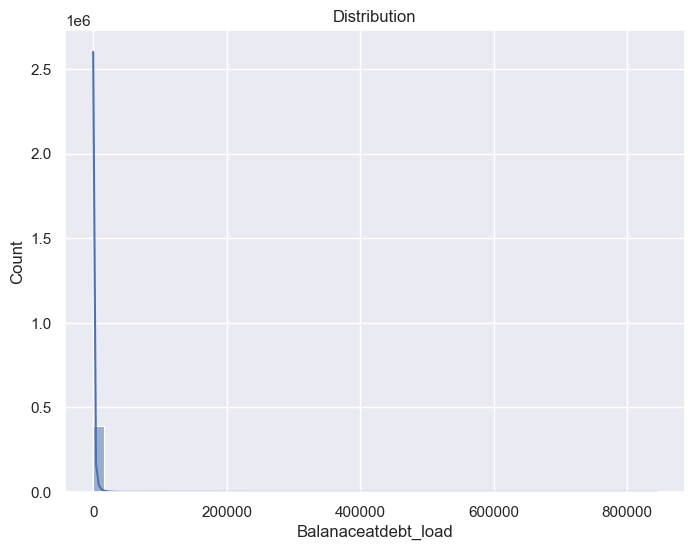

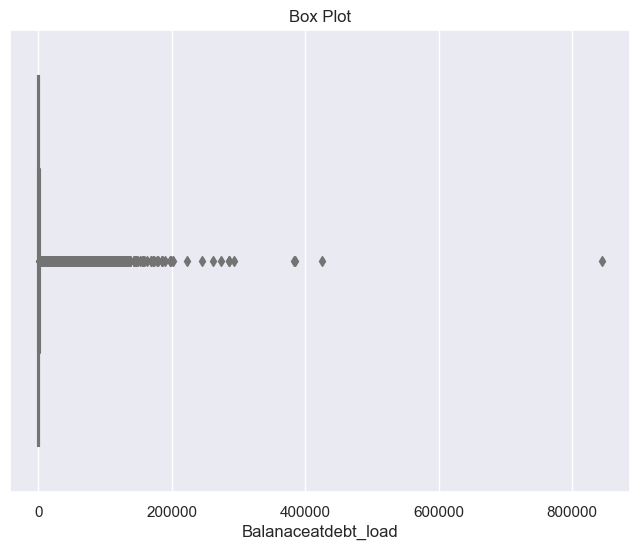


************************************************************************************************************************

Column: PurchasePrice
Descriptive Statistics:
count    390666.000000
mean          5.672118
std           5.518944
min           0.190000
25%           3.070000
50%           4.220000
75%           6.590000
max          52.180000
Name: PurchasePrice, dtype: float64
Visualizations:


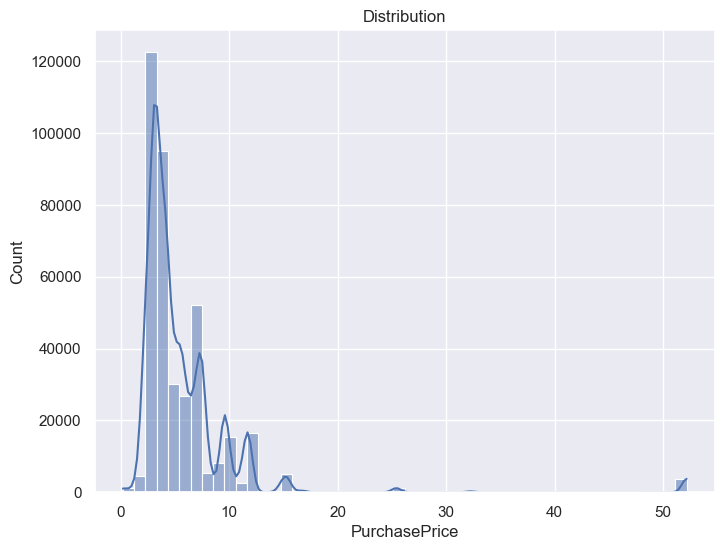

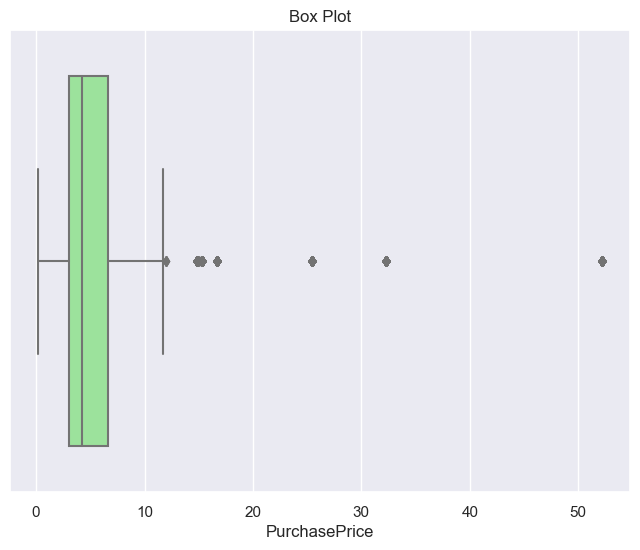


************************************************************************************************************************

Column: NumLiableParties
Descriptive Statistics:
count    390666.000000
mean          1.017823
std           0.135426
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: NumLiableParties, dtype: float64
Visualizations:


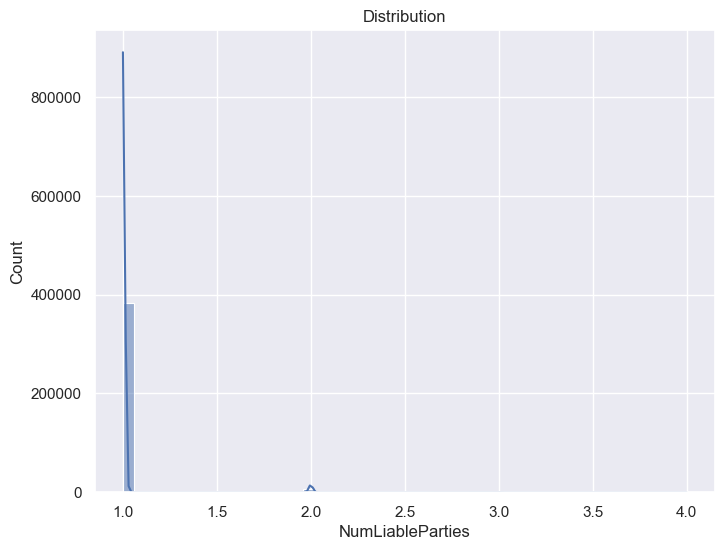

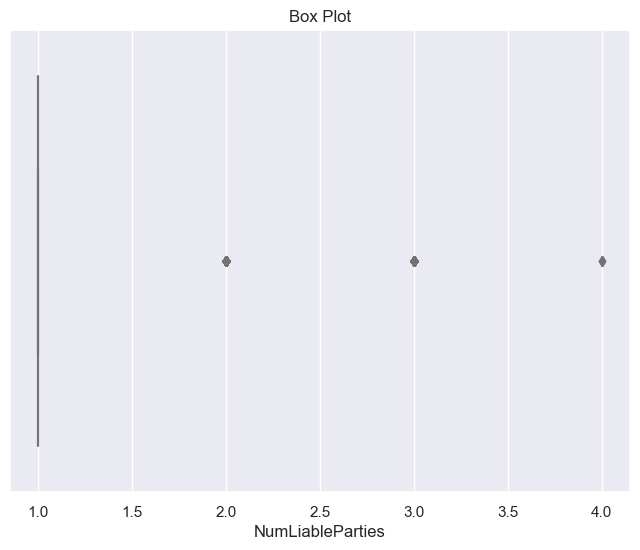


************************************************************************************************************************

Column: CustomerAge
Descriptive Statistics:
count    390666.000000
mean         45.835048
std          12.415090
min           1.000000
25%          37.000000
50%          44.000000
75%          53.000000
max         133.000000
Name: CustomerAge, dtype: float64
Visualizations:


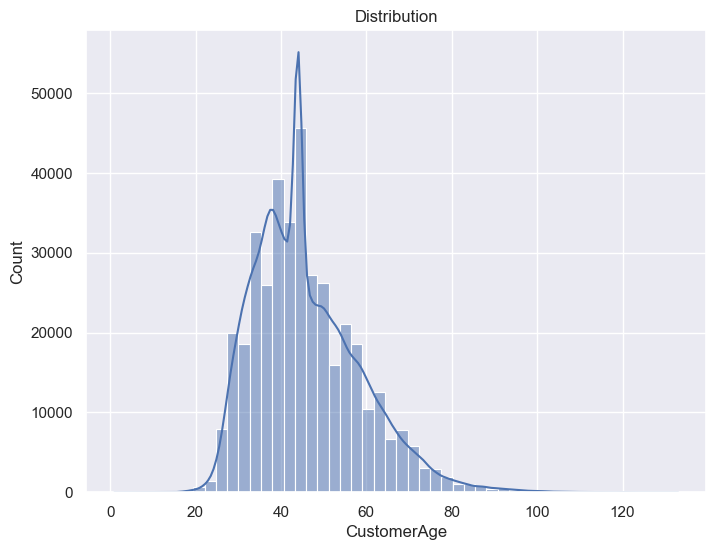

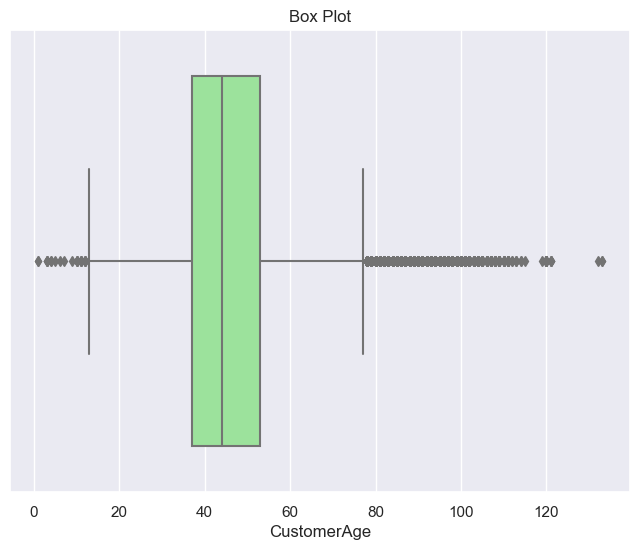


************************************************************************************************************************

Column: NumPhones
Descriptive Statistics:
count    390666.000000
mean          0.432039
std           0.718490
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: NumPhones, dtype: float64
Visualizations:


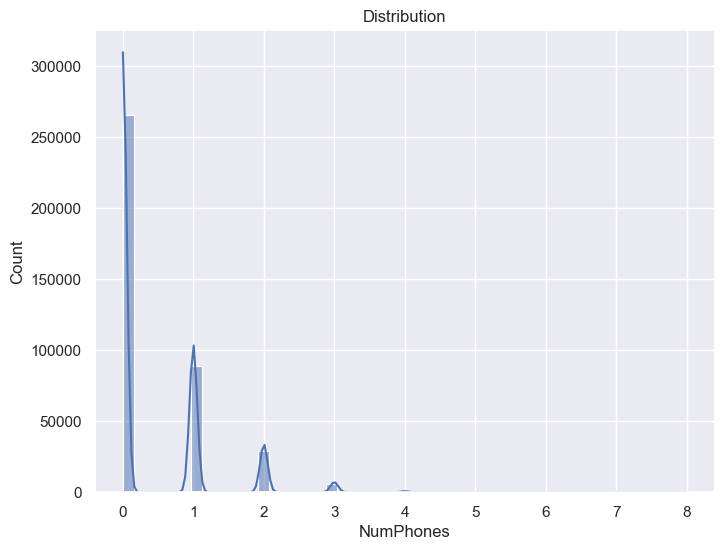

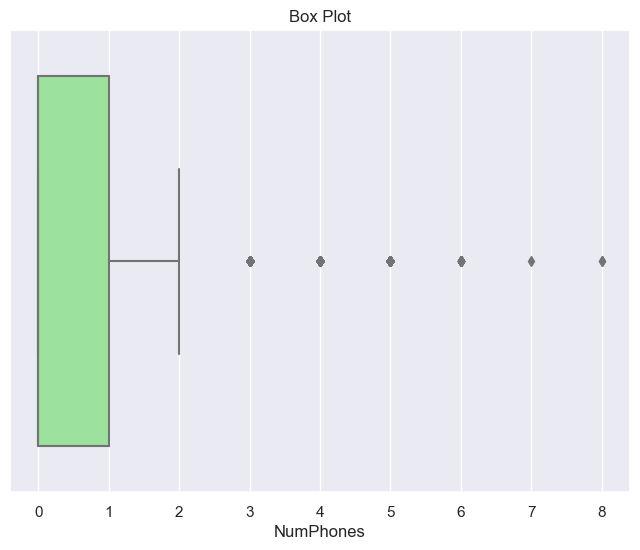


************************************************************************************************************************

Column: NumEmails
Descriptive Statistics:
count    390666.000000
mean          0.216395
std           0.440848
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: NumEmails, dtype: float64
Visualizations:


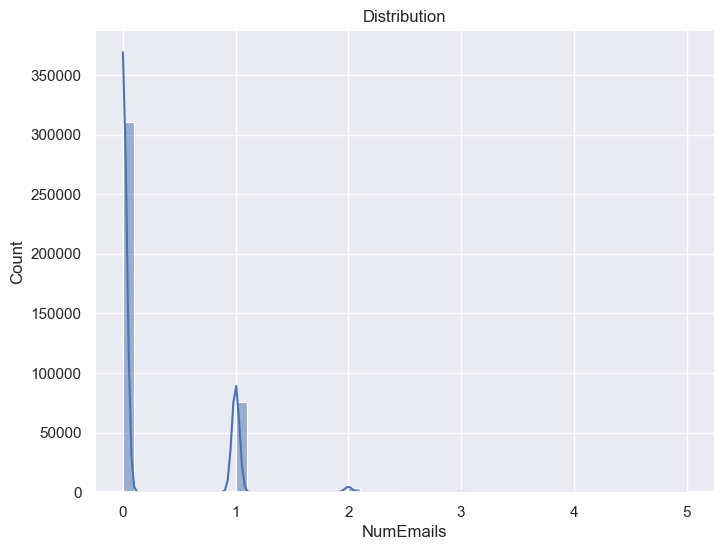

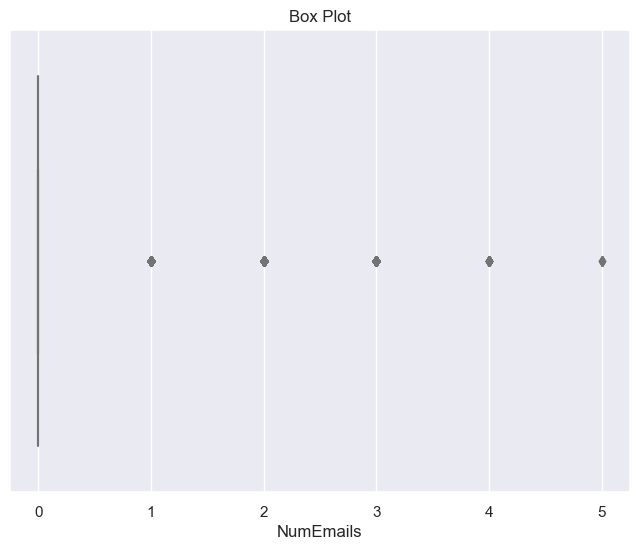


************************************************************************************************************************

Column: NumAddresses
Descriptive Statistics:
count    390666.000000
mean          0.843283
std           0.466236
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: NumAddresses, dtype: float64
Visualizations:


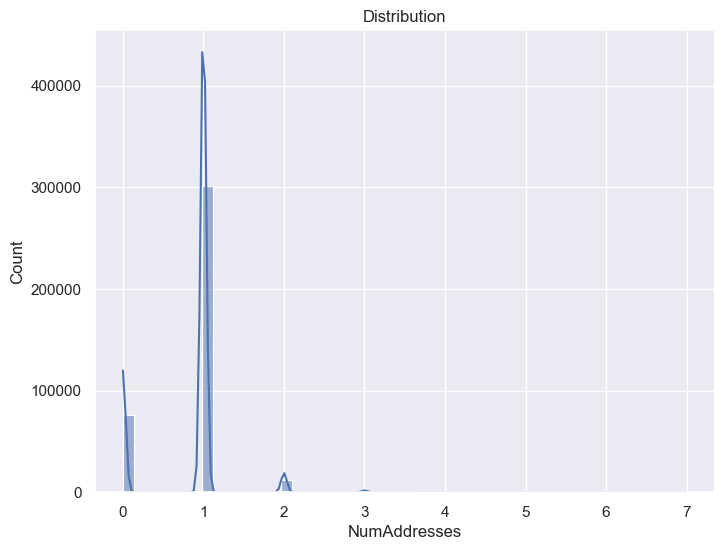

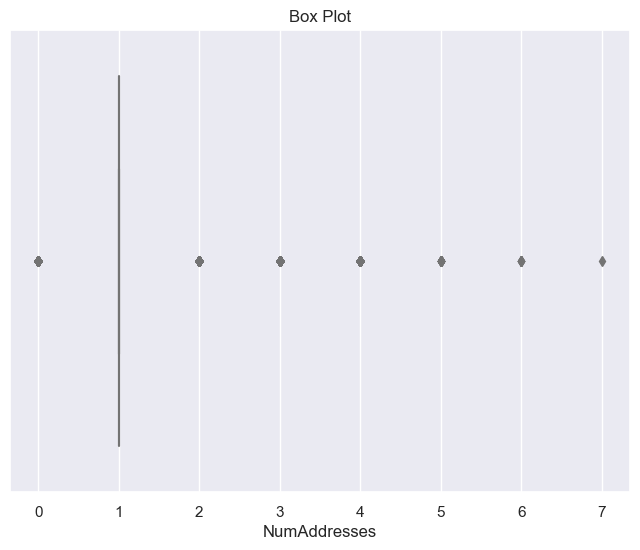


************************************************************************************************************************



In [31]:
# Get a list of numerical column names excluding 'FrequencyEncodedCreditor'

numerical_columns = [col for col in df.select_dtypes(include='number').columns if col != ['CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses']]
for column in numerical_columns:
    
    print(f"Column: {column}")
    print("Descriptive Statistics:")
    print(df[column].describe())

    print("Visualizations:")

 # Histogram with KDE
    plt.figure(figsize=(8, 6))
    
    sns.histplot(df[column], kde=True, bins=50)
    plt.title("Distribution")
    plt.show()

 # Box plot
    plt.figure(figsize=(8, 6))
    
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title("Box Plot")
    plt.show()

    print("\n" + "*" * 120 + "\n")

In [32]:
#Skewness and Kurtosis(after Transformation)

for column in numerical_columns:
    
    skewness = df[column].skew()
    kurtosis = df[column].kurt()
    print(f"Column: {column}")
    print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Column: CurrentBalance
Skewness: 26.607563451740628, Kurtosis: 1571.6270004670018
Column: DebtLoadPrincipal
Skewness: 36.97171323203727, Kurtosis: 4140.757231375256
Column: Balanaceatdebt_load
Skewness: 34.67222987263918, Kurtosis: 3741.3122111243574
Column: PurchasePrice
Skewness: 6.098918599569134, Kurtosis: 46.879040956187104
Column: NumLiableParties
Skewness: 7.811609303415518, Kurtosis: 64.23477646283095
Column: CustomerAge
Skewness: 0.8533116764103693, Kurtosis: 0.906628090889023
Column: NumPhones
Skewness: 1.7699374092366784, Kurtosis: 3.22730931572362
Column: NumEmails
Skewness: 1.8748941297724333, Kurtosis: 3.1985592668142737
Column: NumAddresses
Skewness: -0.18504642966003035, Kurtosis: 3.037263304275204


Visualizations:


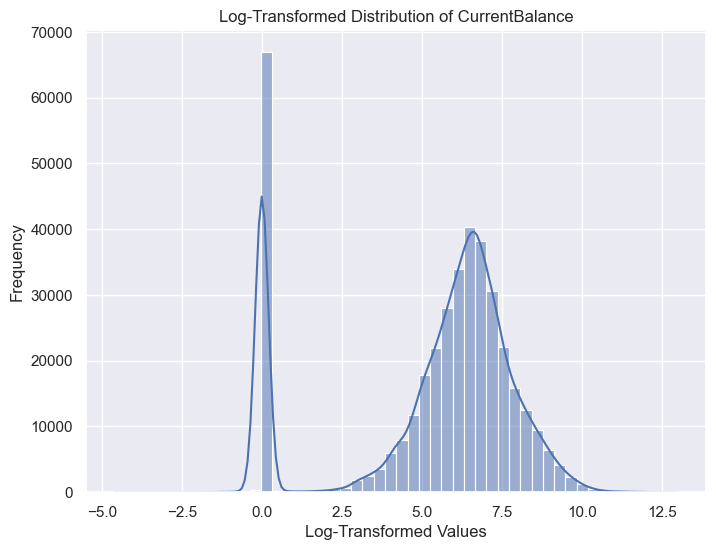

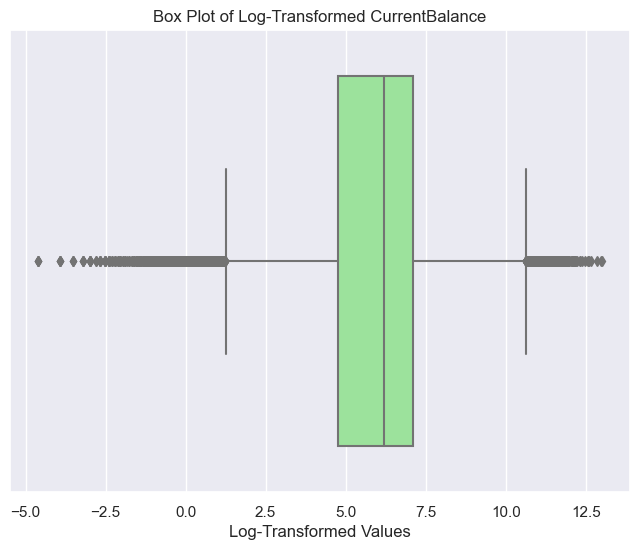

Skewness (after transformation): nan, Kurtosis (after transformation): nan

************************************************************************************************************************

Visualizations:


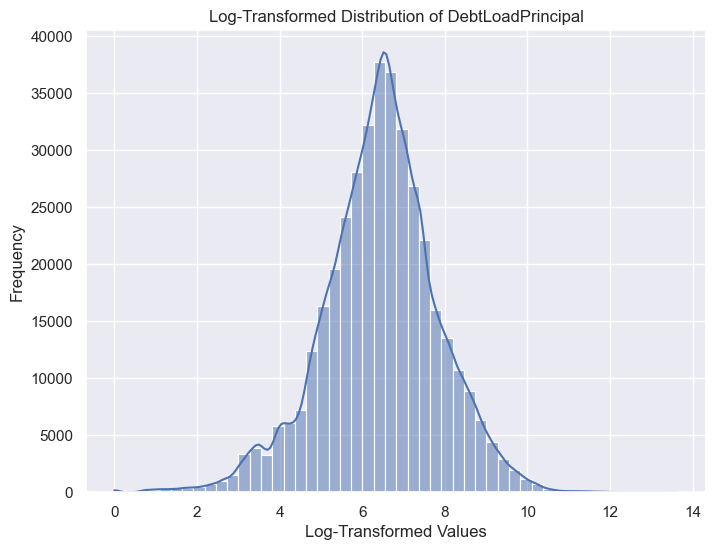

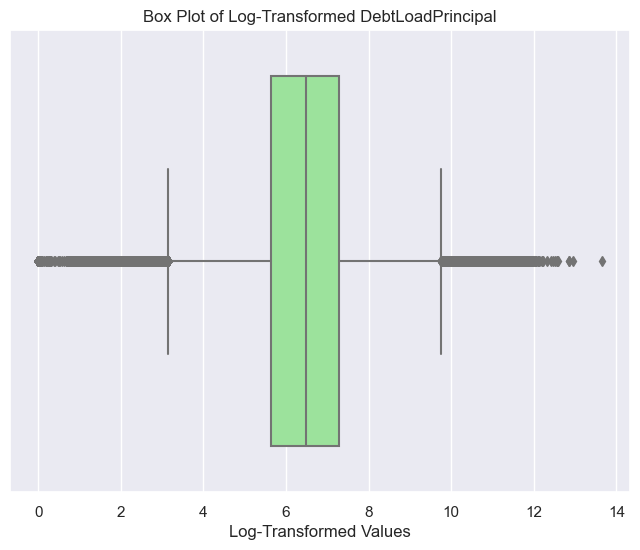

Skewness (after transformation): -0.281426305721438, Kurtosis (after transformation): 0.8902711255977254

************************************************************************************************************************

Visualizations:


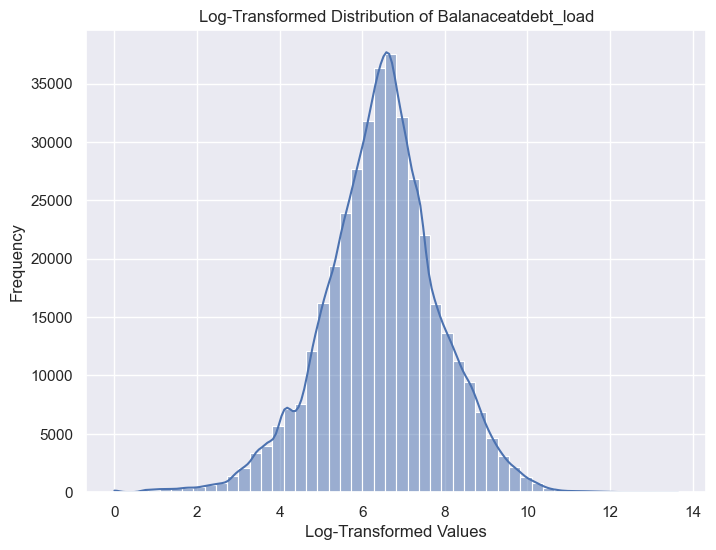

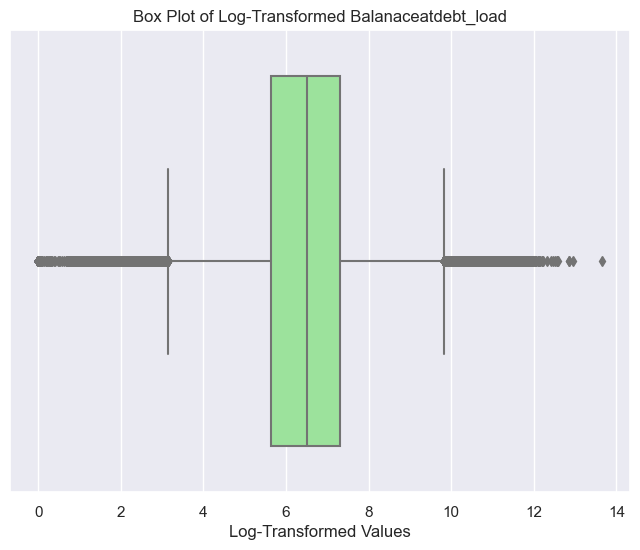

Skewness (after transformation): -0.23120495251245393, Kurtosis (after transformation): 0.8175136422655855

************************************************************************************************************************

Visualizations:


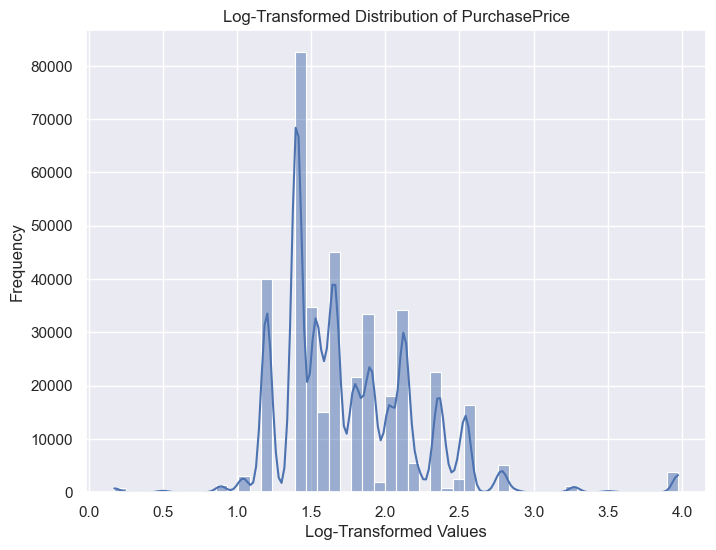

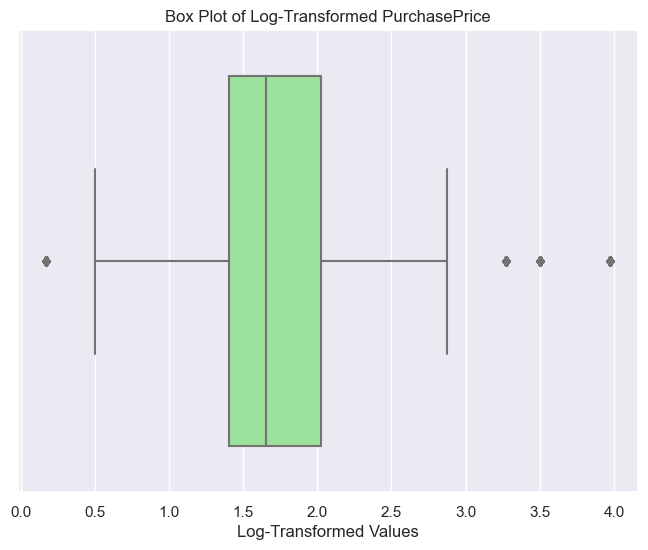

Skewness (after transformation): 1.303611015294067, Kurtosis (after transformation): 3.845597998049203

************************************************************************************************************************

Visualizations:


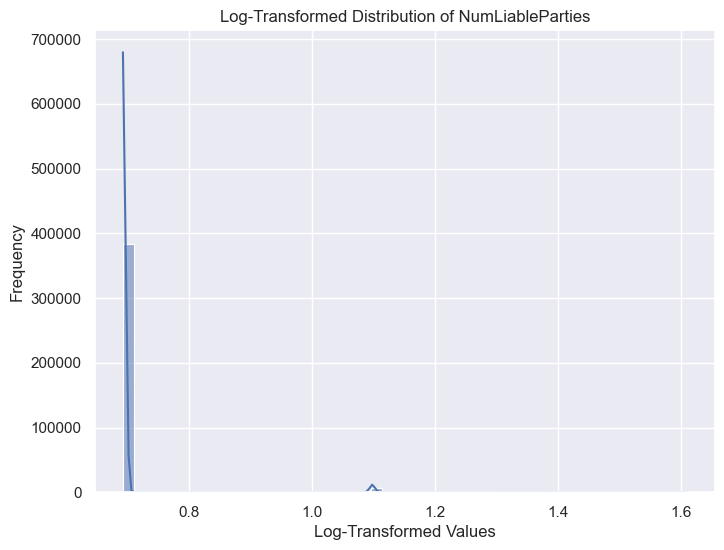

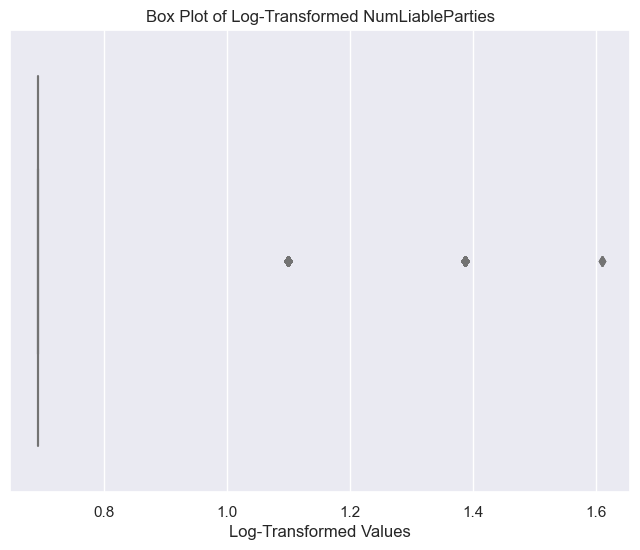

Skewness (after transformation): 7.570940418787564, Kurtosis (after transformation): 57.226045241611864

************************************************************************************************************************

Visualizations:


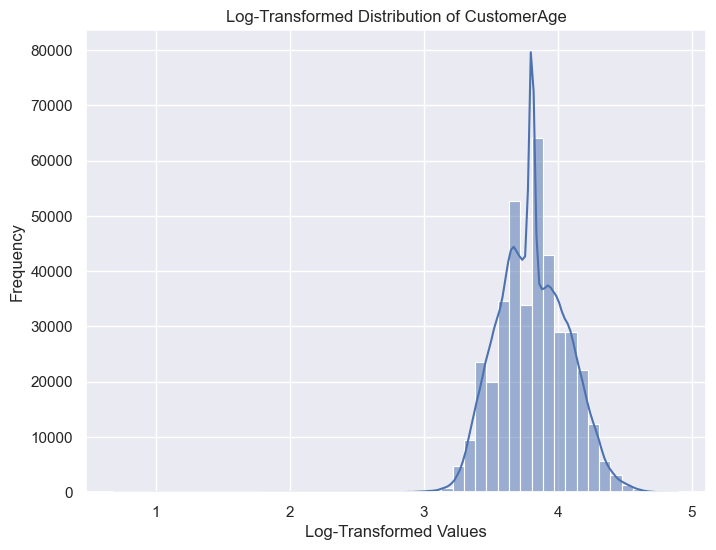

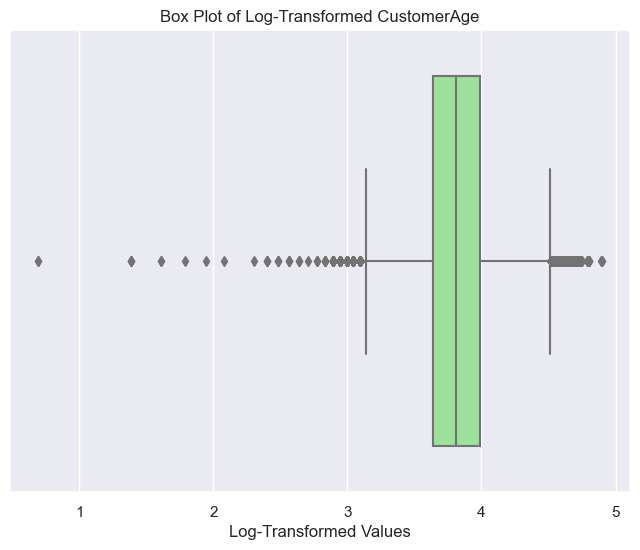

Skewness (after transformation): 0.12576532541338722, Kurtosis (after transformation): 0.009343910752781959

************************************************************************************************************************

Visualizations:


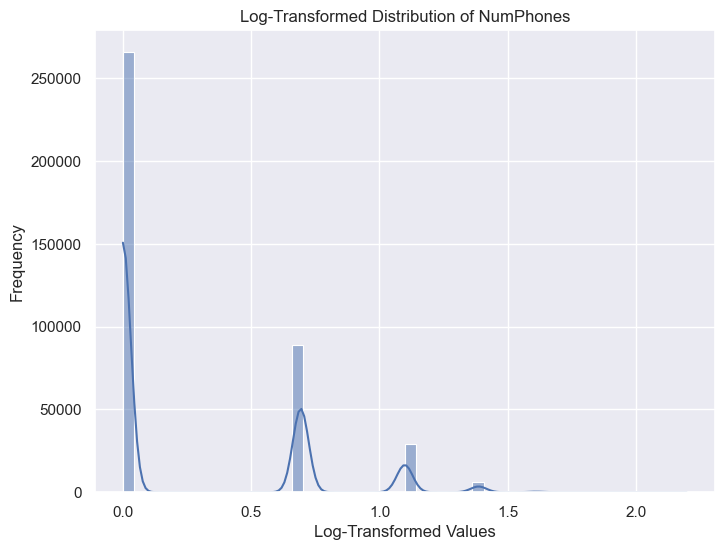

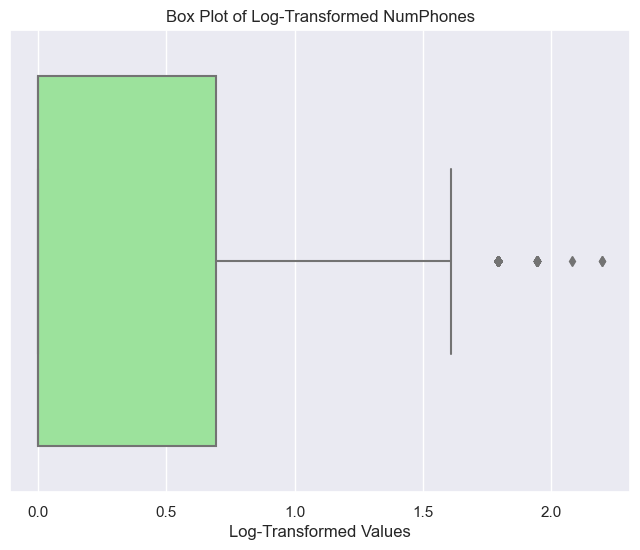

Skewness (after transformation): 1.136210279481666, Kurtosis (after transformation): -0.07455577828861193

************************************************************************************************************************

Visualizations:


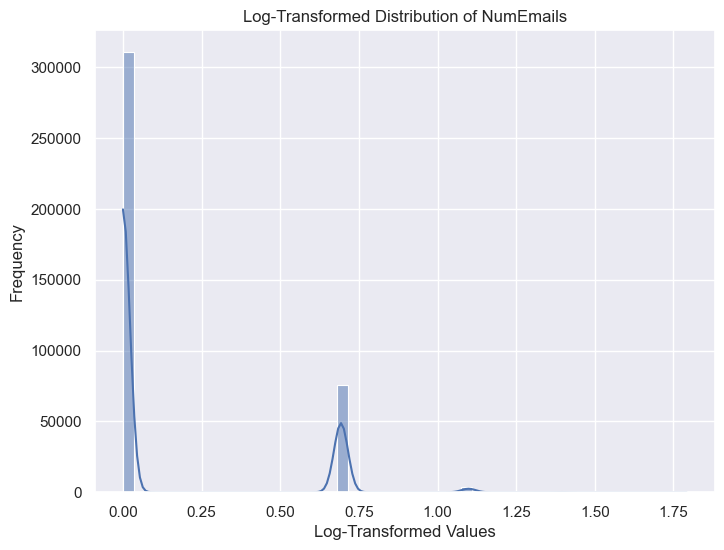

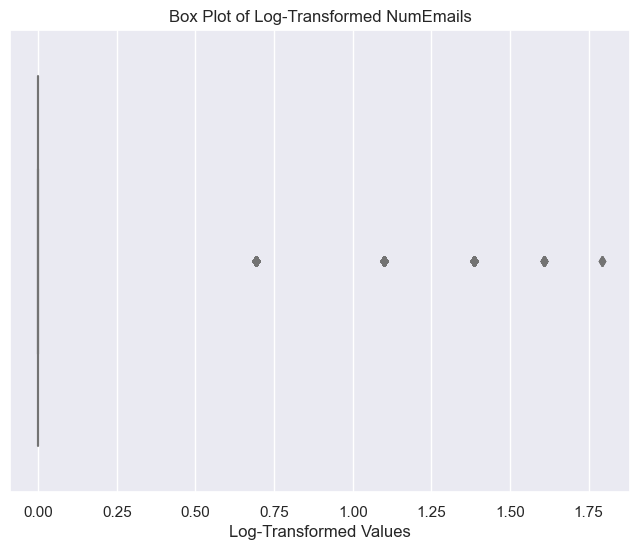

Skewness (after transformation): 1.576901321557771, Kurtosis (after transformation): 0.8195145770924794

************************************************************************************************************************

Visualizations:


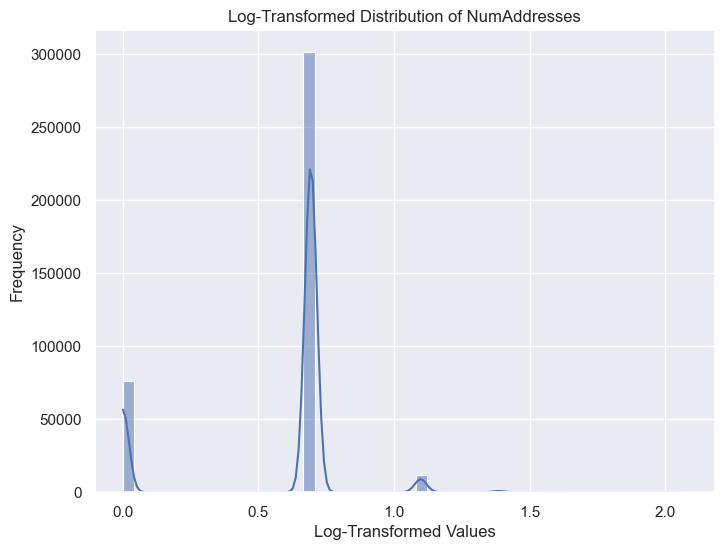

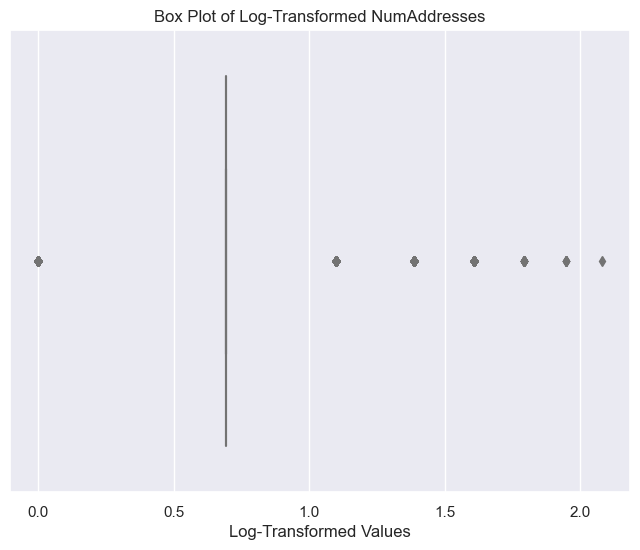

Skewness (after transformation): -1.1382938918618914, Kurtosis (after transformation): 0.4306601018656373

************************************************************************************************************************



In [33]:
for column in numerical_columns:
    
    print("Visualizations:")

    # Log Transformation
    log_transformed_data = np.log1p(df[column])  # Applying log transformation
    plt.figure(figsize=(8, 6))

    # Histogram with KDE for log-transformed data
    sns.histplot(log_transformed_data, kde=True, bins=50)
    plt.title(f"Log-Transformed Distribution of {column}")
    plt.xlabel("Log-Transformed Values")
    plt.ylabel("Frequency")
    plt.show()

    # Box plot for log-transformed data
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=log_transformed_data, color='lightgreen')
    plt.title(f"Box Plot of Log-Transformed {column}")
    plt.xlabel("Log-Transformed Values")
    plt.show()

    skewness = stats.skew(log_transformed_data)
    kurtosis = stats.kurtosis(log_transformed_data)
    print(f"Skewness (after transformation): {skewness}, Kurtosis (after transformation): {kurtosis}")

    print("\n" + "*" * 120 + "\n")

In [34]:
#Outliers Analysis (IQR Method)
#Outliers Analysis for Numerical Columns

numerical_columns = [col for col in df.select_dtypes(include='number').columns if col != ['CurrentBalance', 'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses']]

outlier_info = {}

for column in numerical_columns:
    # Calculate IQR, lower_bound, and upper_bound for each column
    Q1 = df[column].describe()['25%']
    Q3 = df[column].describe()['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


 # Identify outliers for each column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_info[column] = {
     'lower_bound': lower_bound,
     'upper_bound': upper_bound,
     'num_outliers': outliers.shape[0],
     'outliers_description': outliers[column].describe()
 }
# Print outlier information for each numerical column
for column, info in outlier_info.items():
    print(f"Outliers Analysis for '{column}' (using IQR method):")
    print(f"- Based on the IQR method, there are {info['num_outliers']} considered as outliers.")
    print(f"- These outliers have an average {column} of approximately {info['outliers_description']['mean']}.")
    print(f"- The range for these outliers is from {info['outliers_description']['min']} to {info['outliers_description']['max']}.")
    print("\nOutliers Description:")
    print(info['outliers_description'])
    print("\n" + "*" * 120 + "\n")

Outliers Analysis for 'CurrentBalance' (using IQR method):
- Based on the IQR method, there are 41451 considered as outliers.
- These outliers have an average CurrentBalance of approximately 7697.947581722998.
- The range for these outliers is from -7717.2 to 441681.52.

Outliers Description:
count     41451.000000
mean       7697.947582
std       10493.002238
min       -7717.200000
25%        3722.880000
50%        5173.950000
75%        8203.090000
max      441681.520000
Name: CurrentBalance, dtype: float64

************************************************************************************************************************

Outliers Analysis for 'DebtLoadPrincipal' (using IQR method):
- Based on the IQR method, there are 43227 considered as outliers.
- These outliers have an average DebtLoadPrincipal of approximately 8247.996820968376.
- The range for these outliers is from 3215.5 to 844343.0.

Outliers Description:
count     43227.000000
mean       8247.996821
std       11353.52

In [35]:
#Since Customer age has outliers
#Replacing all lower values by lower limit.
#Replacing all upper values with upper limit.

q1 = df['CustomerAge'].quantile(0.25)
q3 = df['CustomerAge'].quantile(0.75)
iqr = q3 - q1
ll = q1 - (1.5 * iqr)
ul = q3 + (1.5 * iqr)
ul_outlier = df[df['CustomerAge'] > ul].shape[0]
ll_outlier = df[df['CustomerAge'] < ll].shape[0]
total_outlier = ul_outlier + ll_outlier
percentage = total_outlier * 100 / df.shape[0]
print(ul_outlier)
print(ll_outlier)
print(total_outlier)
print(percentage)
print(ll)
print(ul)

6533
24
6557
1.6784158334741186
13.0
77.0


In [36]:
#Since Customer age has outliers

df[df['CustomerAge'] < 18]

OriginalCreditor_Redacted  CurrentBalance  DebtLoadPrincipal  \
6624                  Creditor 7            0.00              37.00   
7236                  Creditor 7            0.00              37.00   
9029                  Creditor 7            0.00              36.37   
11172                 Creditor 7            0.00              36.00   
27900                 Creditor 7           17.26              45.00   
...                          ...             ...                ...   
304291               Creditor 47          153.08             139.16   
306156               Creditor 47          199.16             181.05   
306176               Creditor 47          304.82             277.11   
308526               Creditor 47          920.76             837.05   
308619               Creditor 47          499.91             454.46   

        Balanaceatdebt_load  PurchasePrice        ProductOrDebtType  \
6624                  46.63           4.22                    Other   
7236                  46.63           4.22                    Other   
9029                  46.00           4.22                    Other   
11172                 45.29           4.22                    Other   
27900                 59.38           4.22                    Other   
...                     ...            ...                      ...   
304291               139.16           2.32  Utilities/Telco - Other   
306156               181.05           2.32  Utilities/Telco - Other   
306176               277.11           2.32  Utilities/Telco - Other   
308526               837.05           2.32  Utilities/Telco - Other   
308619               454.46           2.32  Utilities/Telco - Other   

       CollectionStatus InBankruptcy IsLegal  NumLiableParties  CustomerAge  \
6624       PAID_IN_FULL            N       N               1.0         10.0   
7236       PAID_IN_FULL            N       N               1.0          4.0   
9029       PAID_IN_FULL            N       N               1.0          3.0   
11172      PAID_IN_FULL            N       N               1.0          3.0   
27900           PASSIVE            N       N               1.0          3.0   
...                 ...          ...     ...               ...          ...   
304291           ACTIVE            N       N               1.0         13.0   
306156           ACTIVE            N       N               1.0         13.0   
306176           ACTIVE            N       N               1.0         13.0   
308526           ACTIVE            N       N               1.0         10.0   
308619           ACTIVE            N       N               1.0         10.0   

        NumPhones  NumEmails  NumAddresses IsStatBarred  
6624            1          0             1            N  
7236            1          0             1            N  
9029            1          0             1            N  
11172           1          0             1            N  
27900           1          0             1            Y  
...           ...        ...           ...          ...  
304291          0          0             0            Y  
306156          0          0             1            Y  
306176          0          0             1            Y  
308526          0          0             0            Y  
308619          0          0             0            Y  

[70 rows x 15 columns]

In [37]:
ll = 18

# Set upper bounds for CustomerAge
df.loc[df['CustomerAge'] > ul, 'CustomerAge'] = ul

# Set lower bounds for CustomerAge
df.loc[df['CustomerAge'] < ll, 'CustomerAge'] = ll


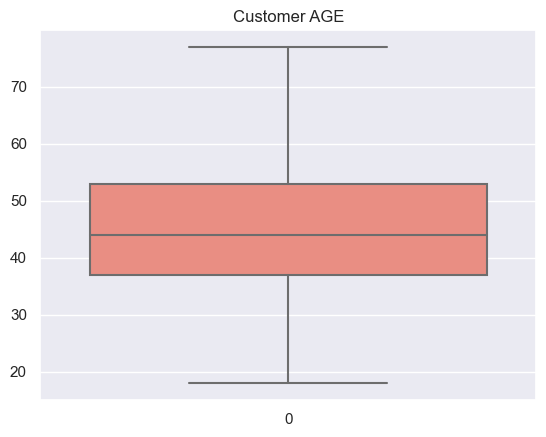

In [38]:
sns.boxplot(df['CustomerAge'], color = 'salmon')
plt.title("Customer AGE")
plt.show()

In [39]:
df.columns

Index(['OriginalCreditor_Redacted', 'CurrentBalance', 'DebtLoadPrincipal',
       'Balanaceatdebt_load', 'PurchasePrice', 'ProductOrDebtType',
       'CollectionStatus', 'InBankruptcy', 'IsLegal', 'NumLiableParties',
       'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses',
       'IsStatBarred'],
      dtype='object')

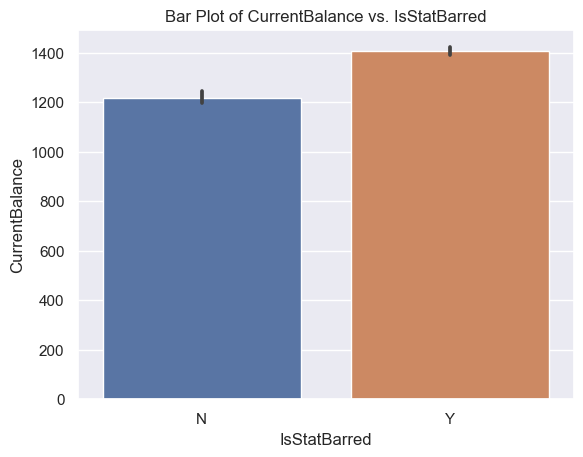

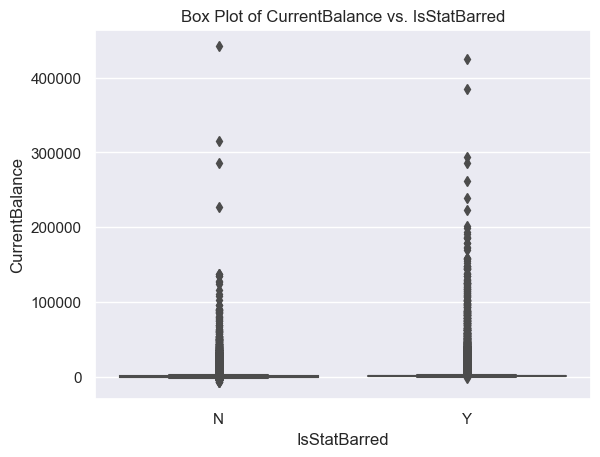

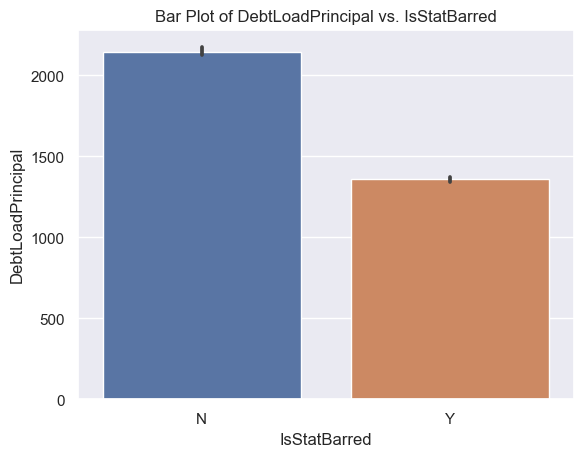

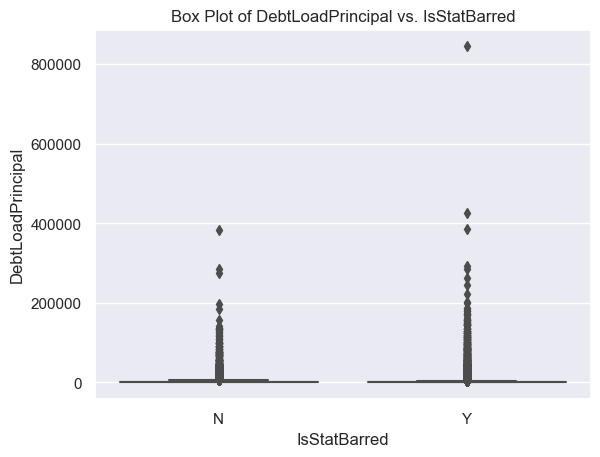

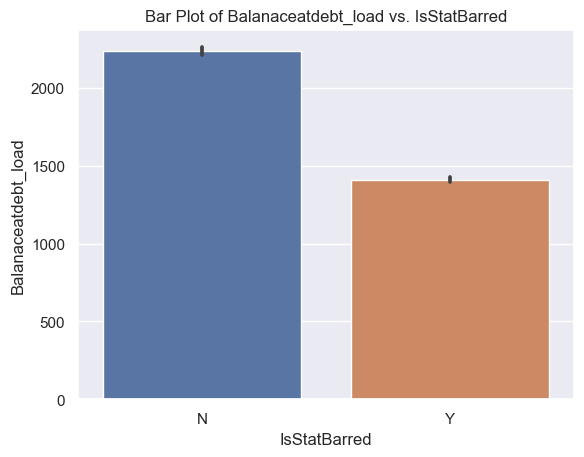

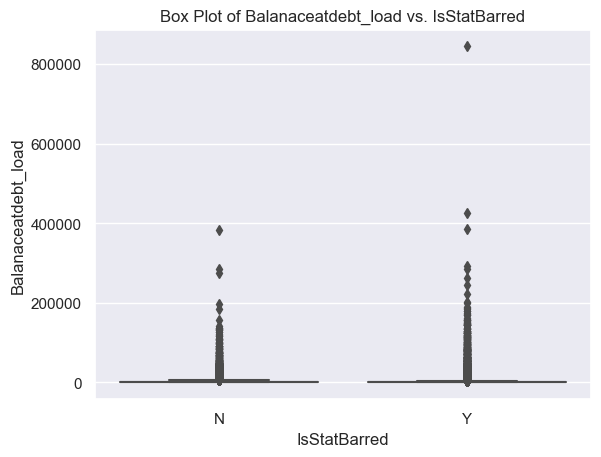

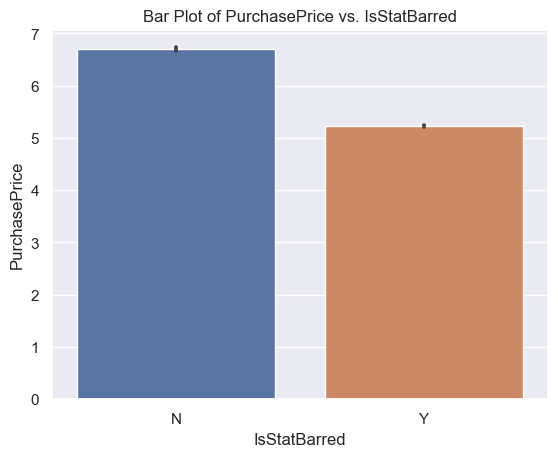

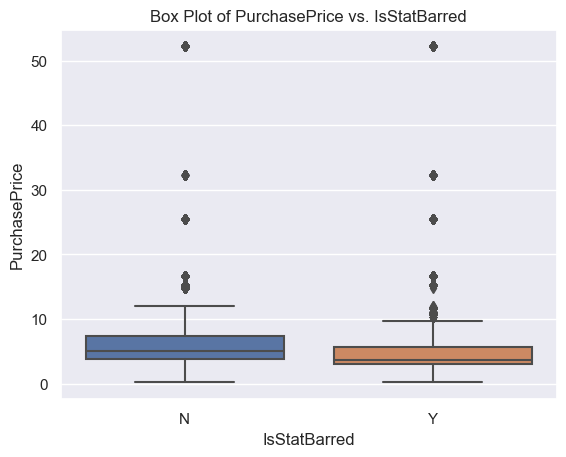

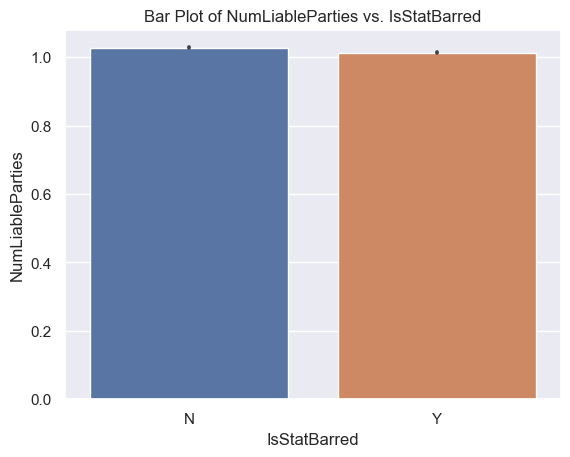

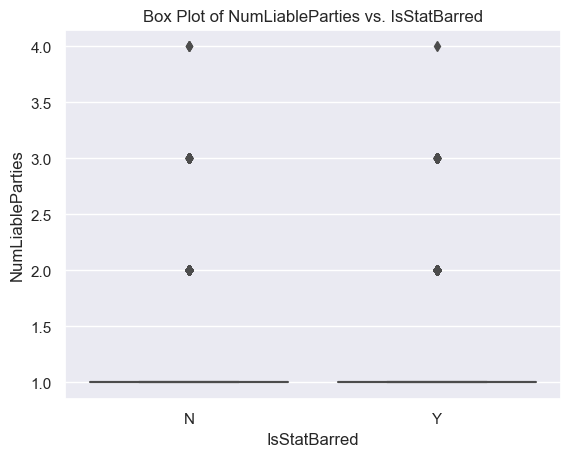

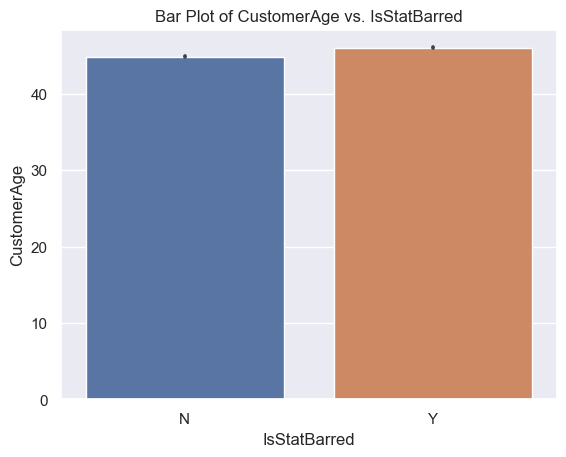

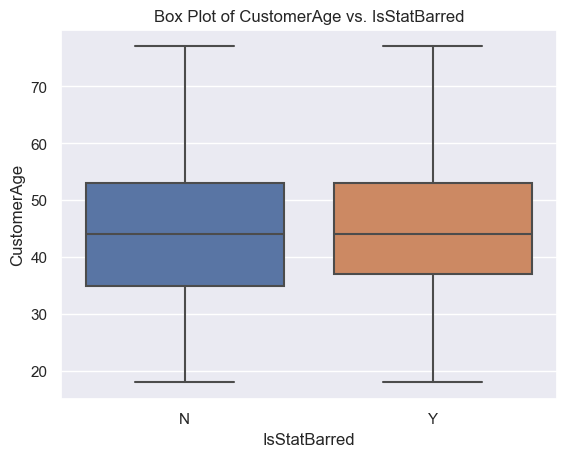

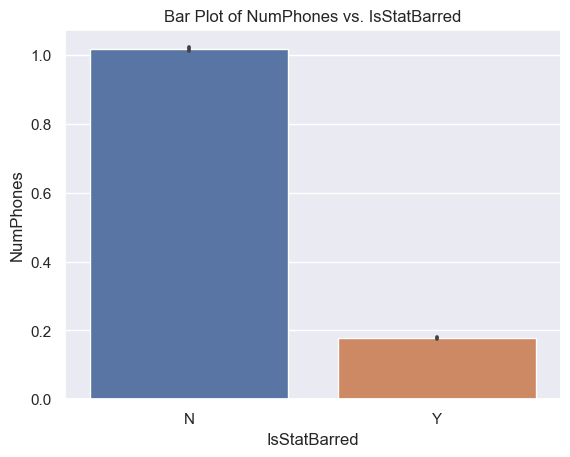

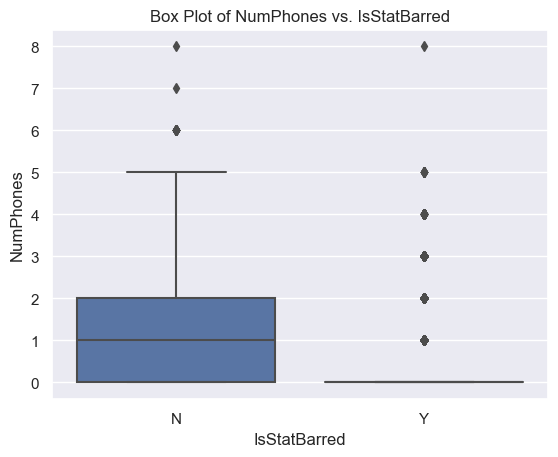

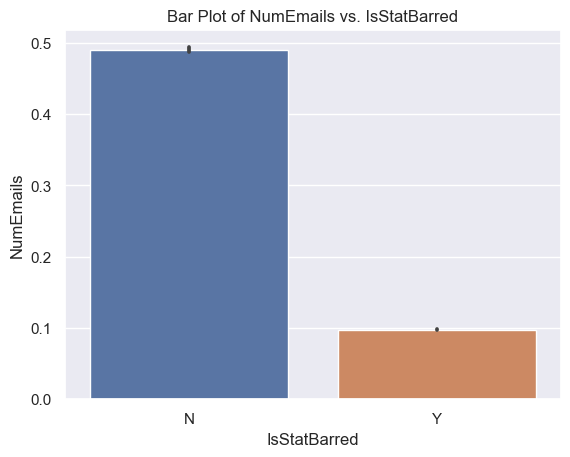

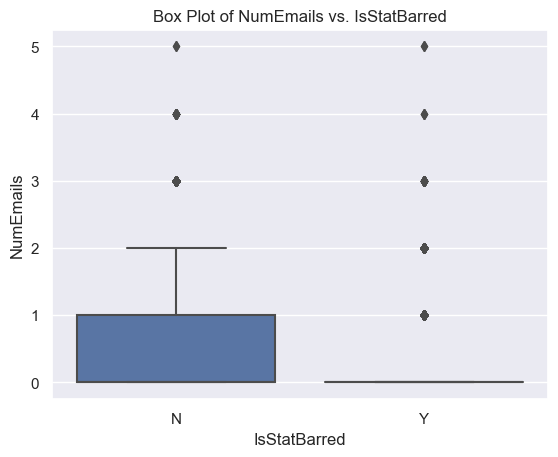

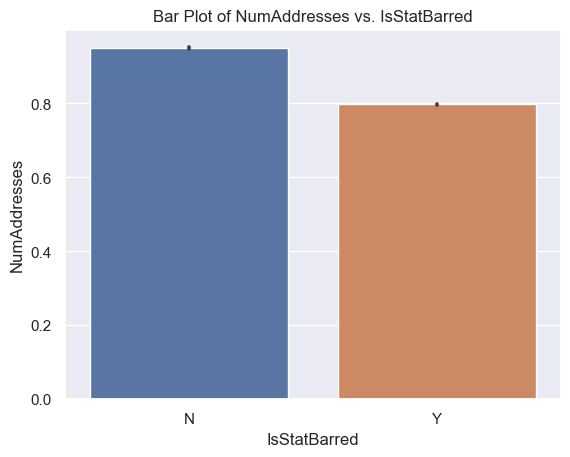

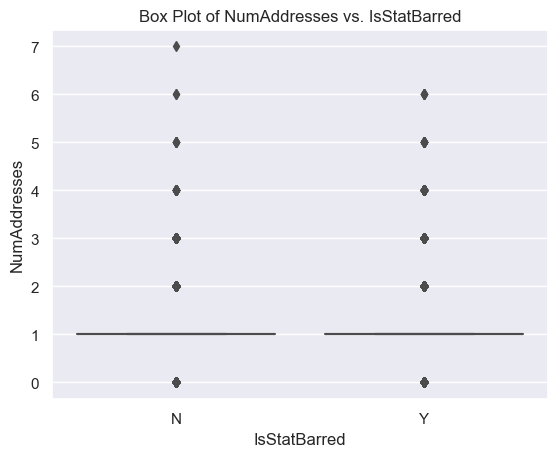

************************************************************************************************************************


In [40]:
#EDA Multivariate Analysis

for column in numerical_columns:
 # Create a bar plot for each numerical column against 'IsStatBarred'
 sns.barplot(x=df['IsStatBarred'], y=df[column], estimator=np.mean)

 # Add a title to the plot
 plt.title(f'Bar Plot of {column} vs. IsStatBarred')

 # Show the plot
 plt.show()

 # Create a box plot for each numerical column against 'IsStatBarred'
 sns.boxplot(x=df['IsStatBarred'], y=df[column])

 # Add a title to the box plot
 plt.title(f'Box Plot of {column} vs. IsStatBarred')

 # Show the box plot
 plt.show()

print("*" * 120)

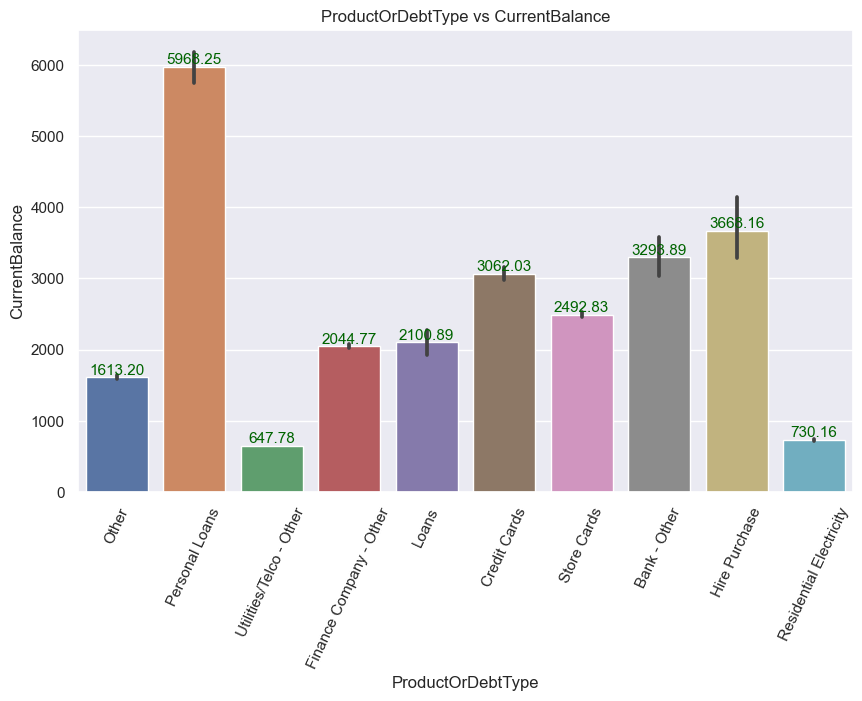

************************************************************************************************************************


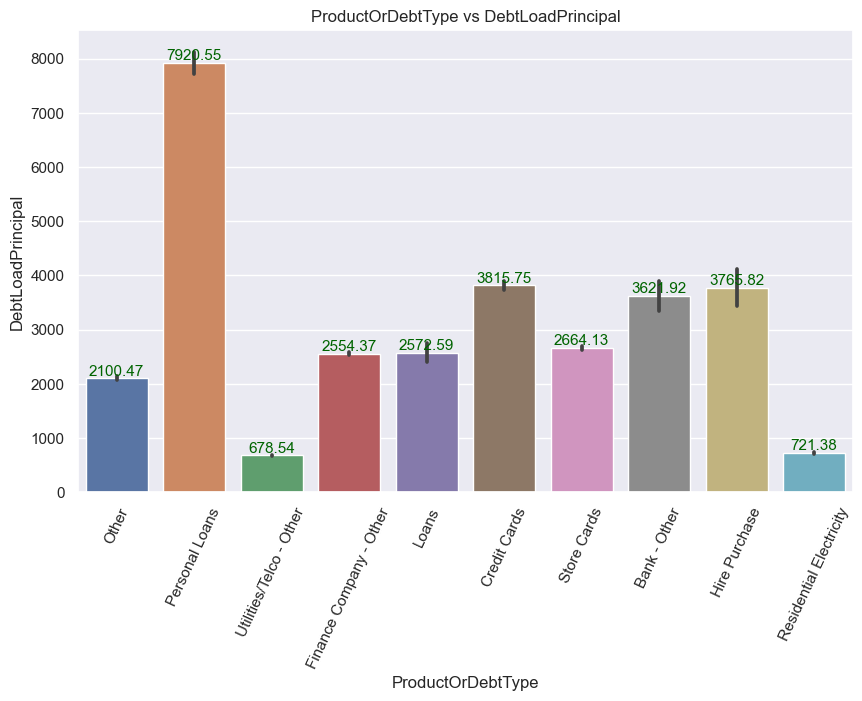

************************************************************************************************************************


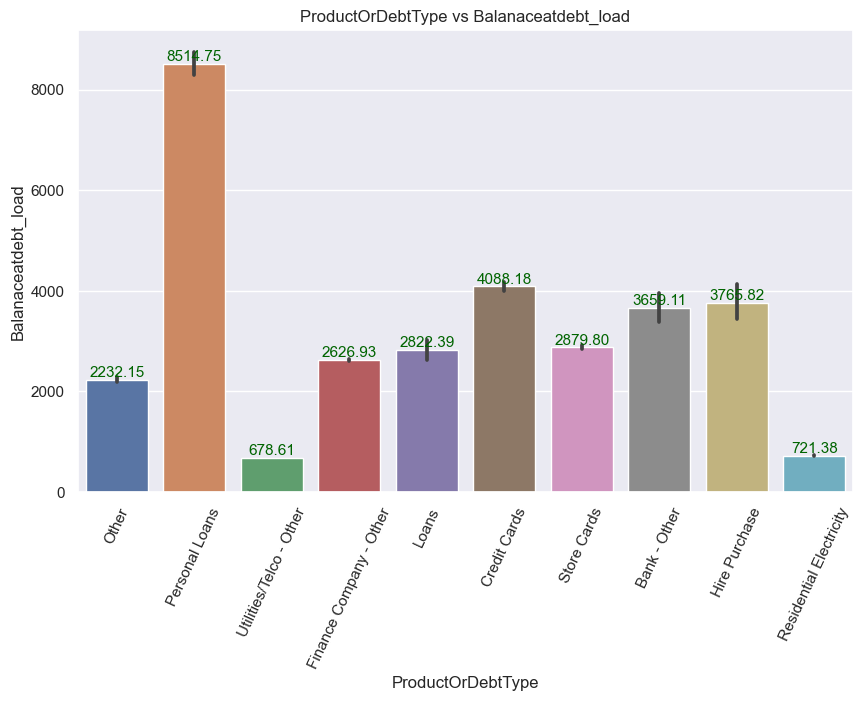

************************************************************************************************************************


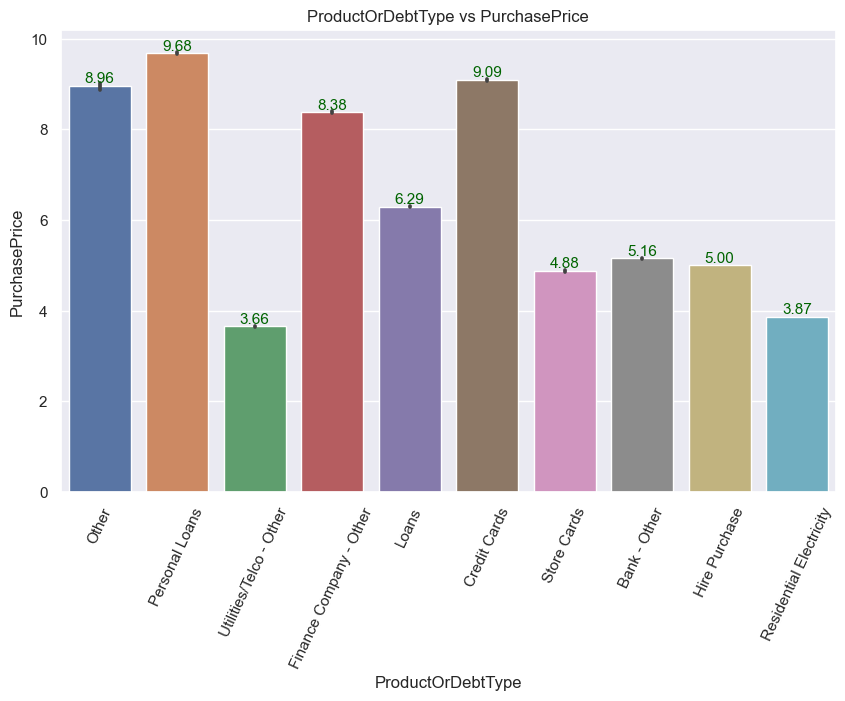

************************************************************************************************************************


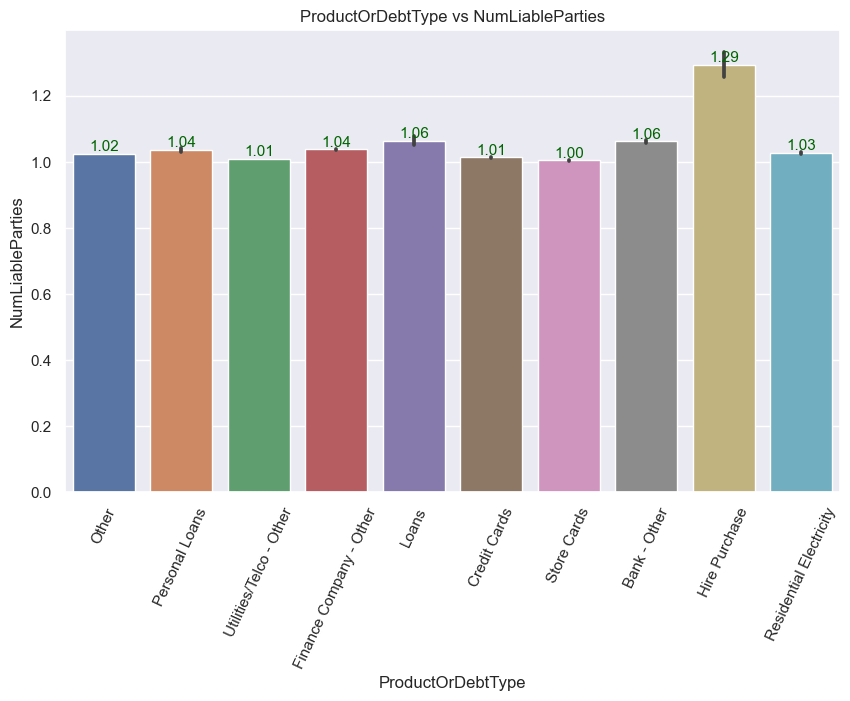

************************************************************************************************************************


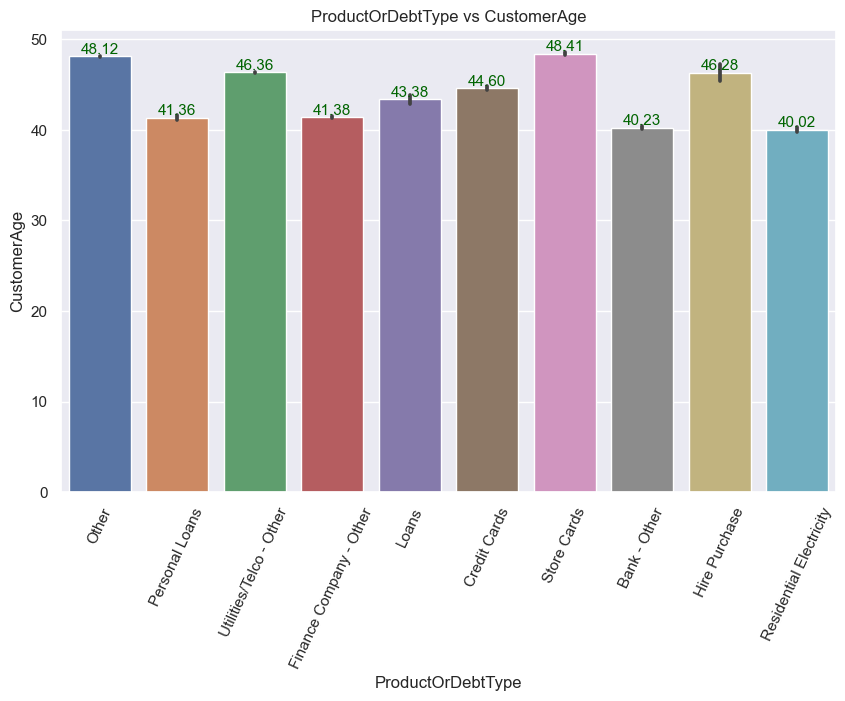

************************************************************************************************************************


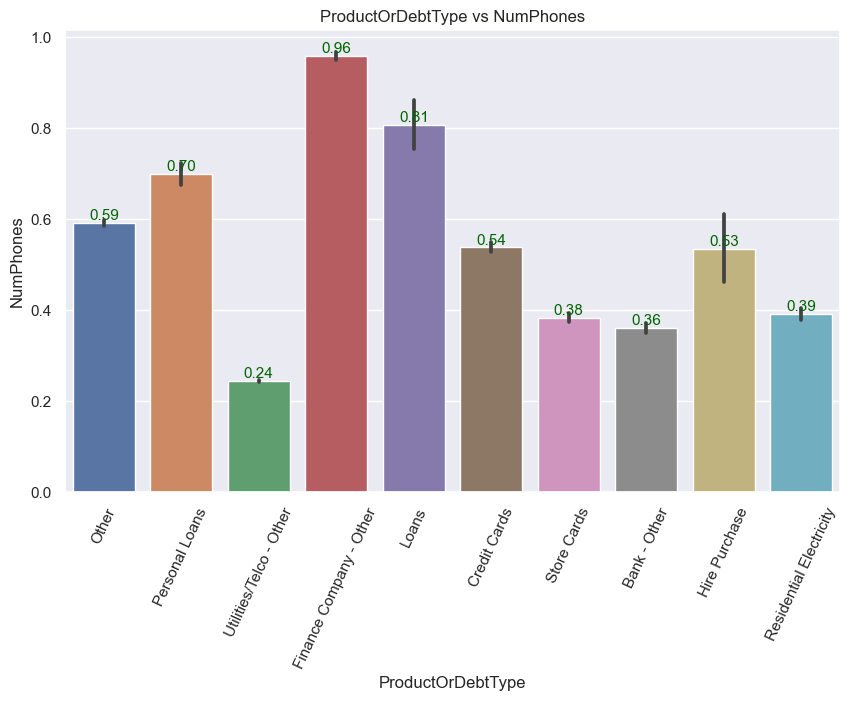

************************************************************************************************************************


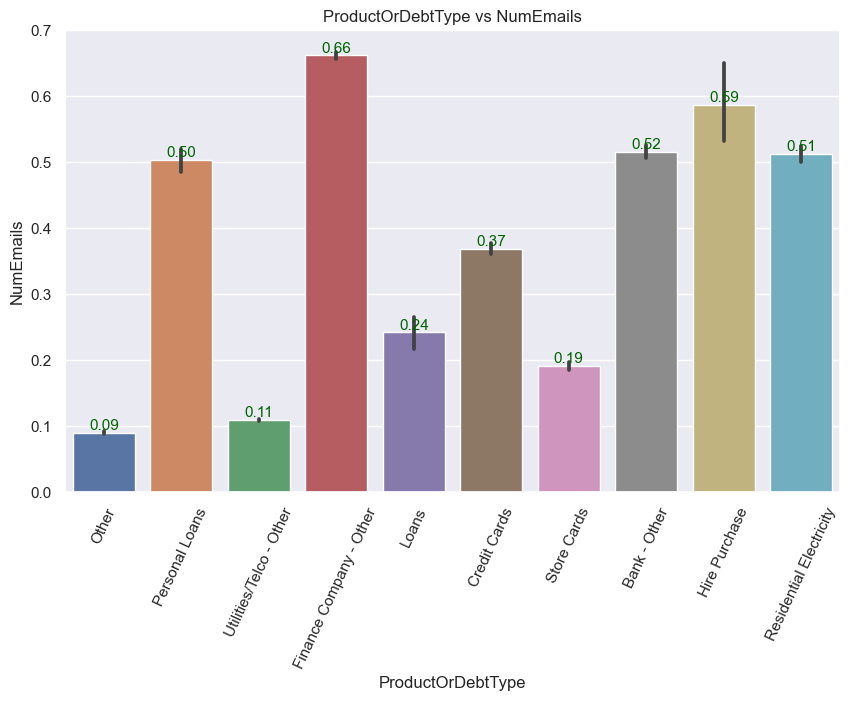

************************************************************************************************************************


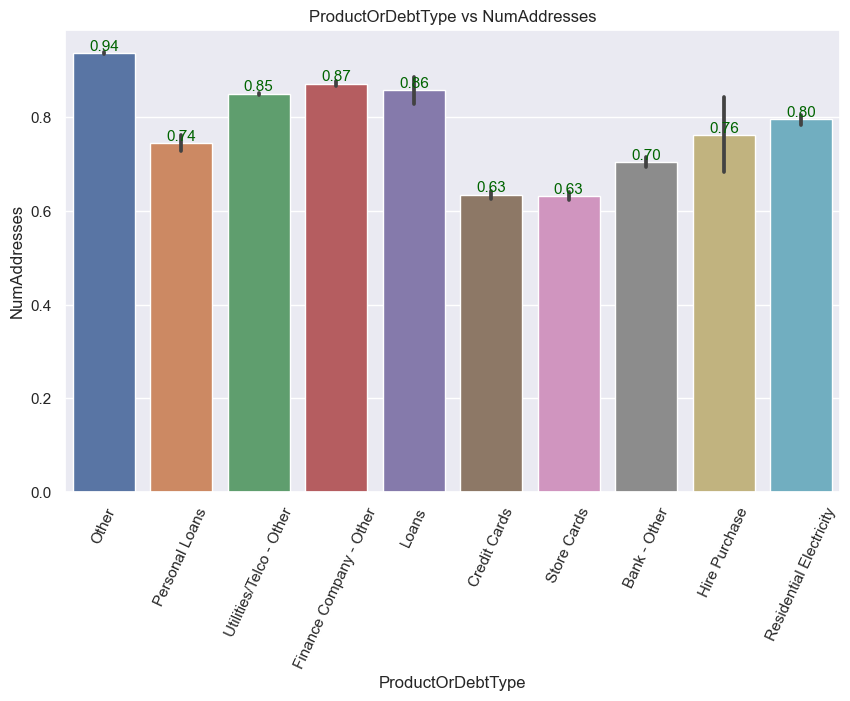

************************************************************************************************************************


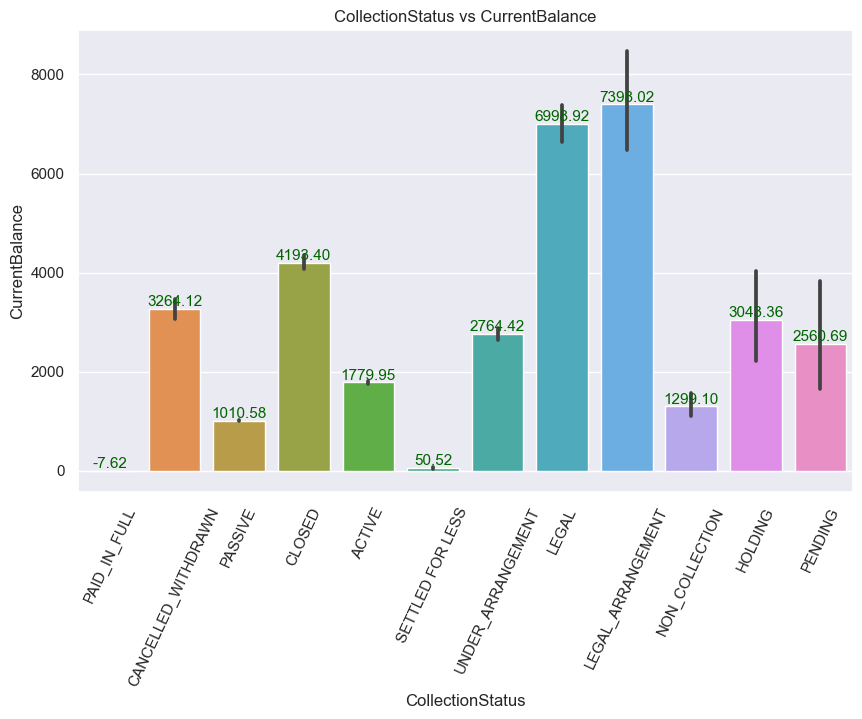

************************************************************************************************************************


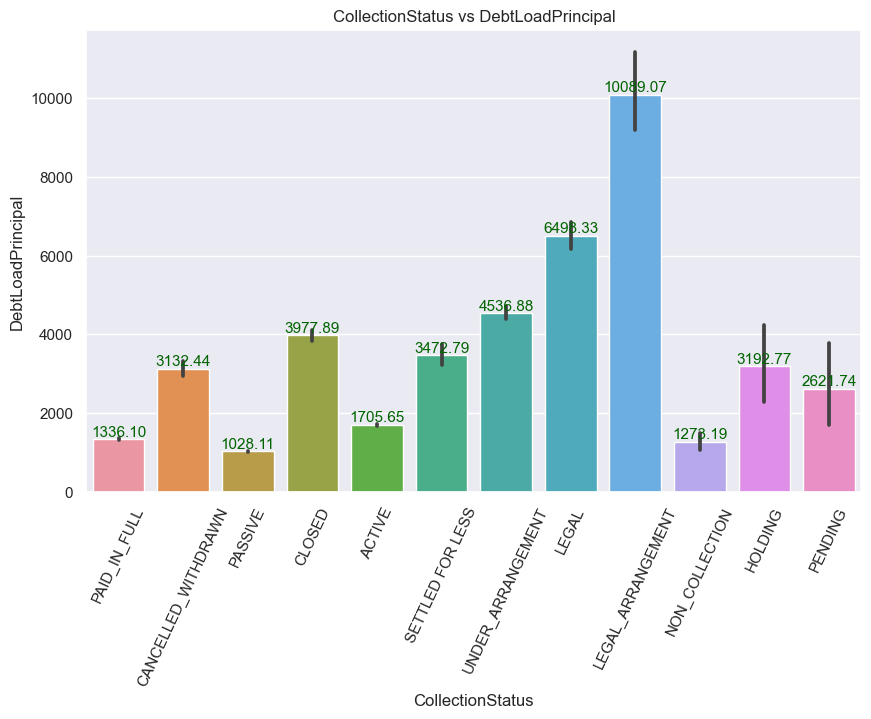

************************************************************************************************************************


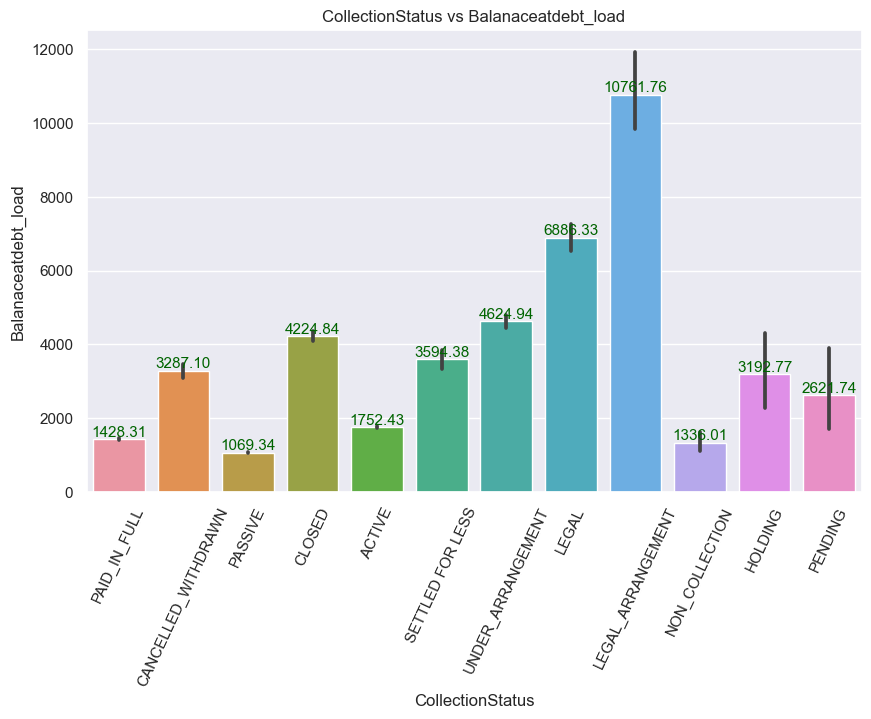

************************************************************************************************************************


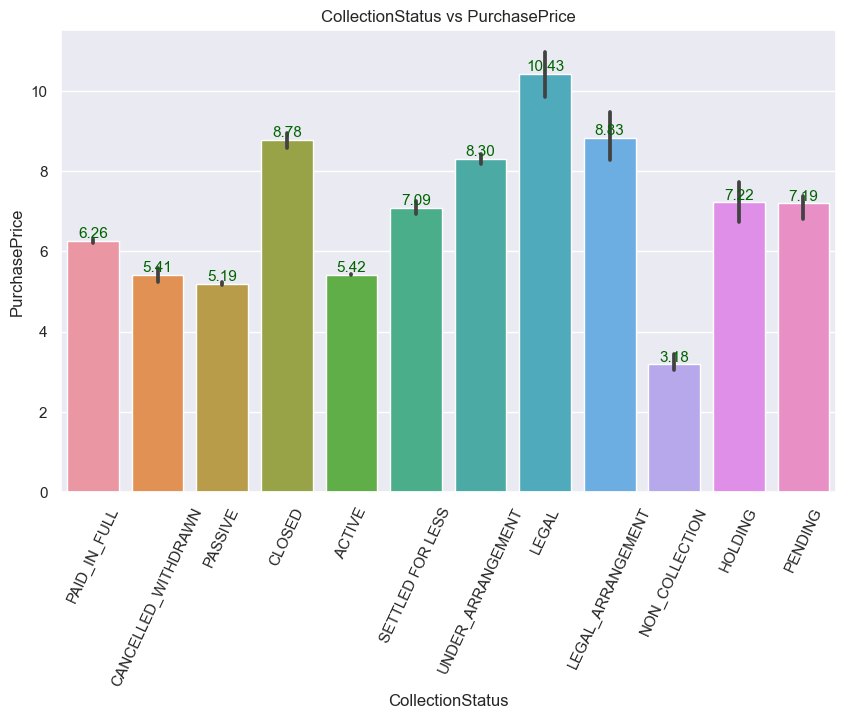

************************************************************************************************************************


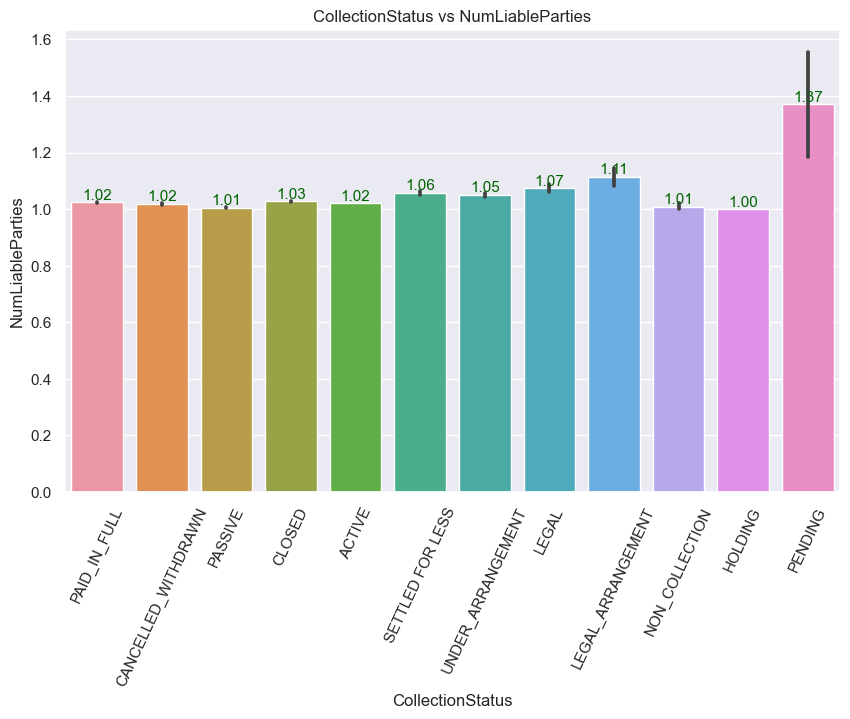

************************************************************************************************************************


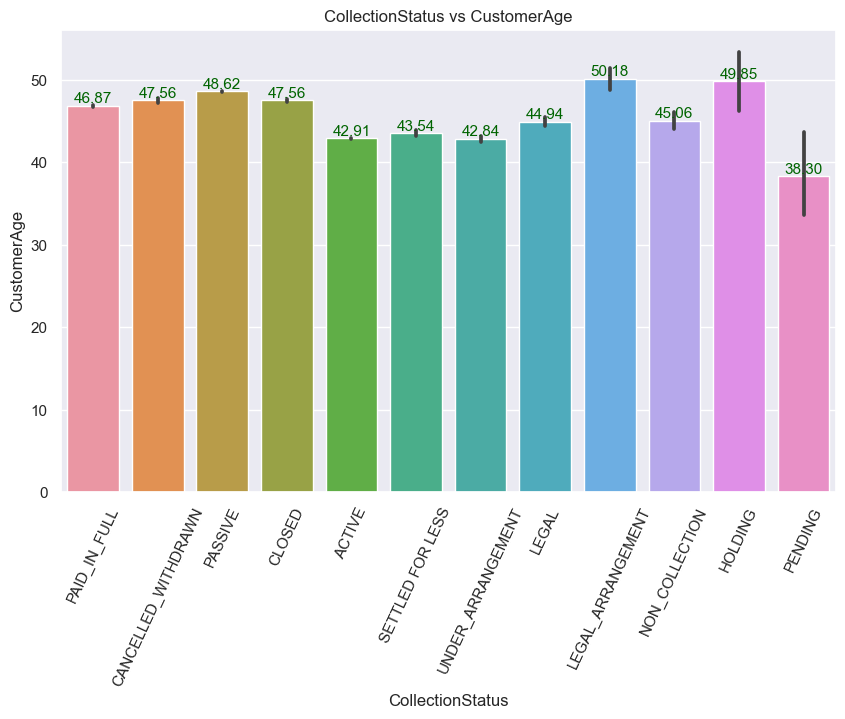

************************************************************************************************************************


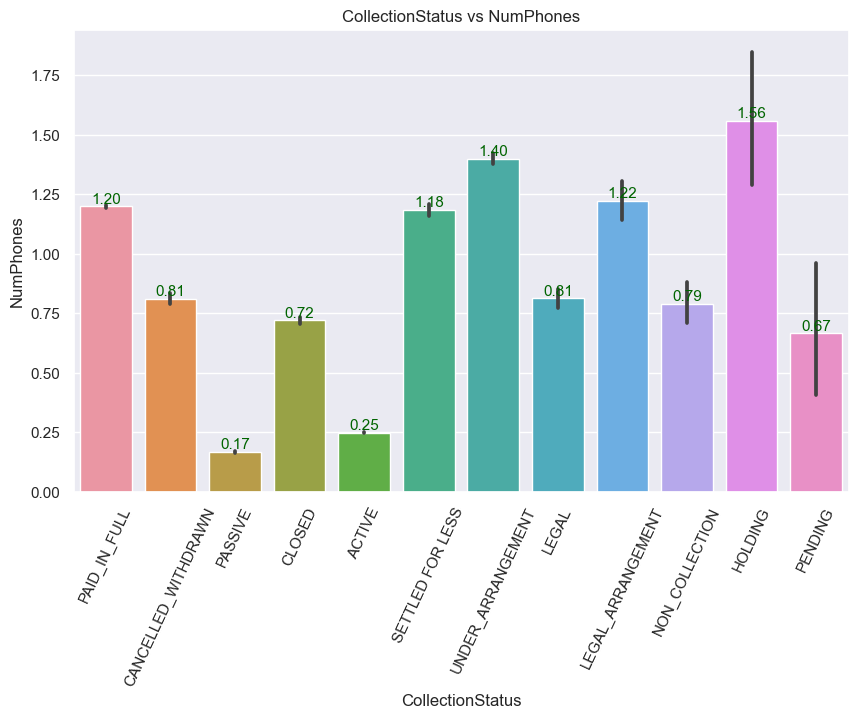

************************************************************************************************************************


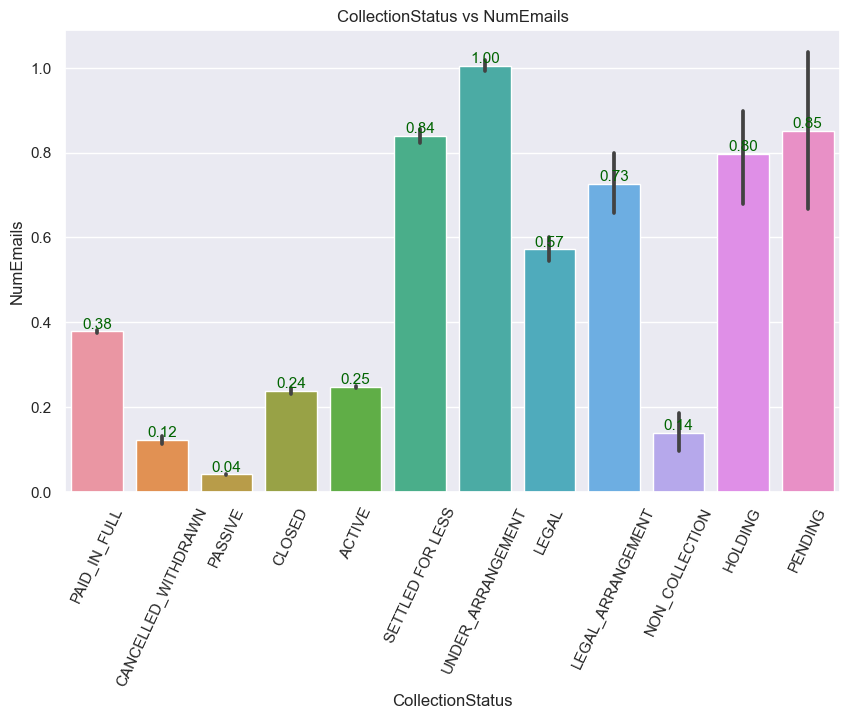

************************************************************************************************************************


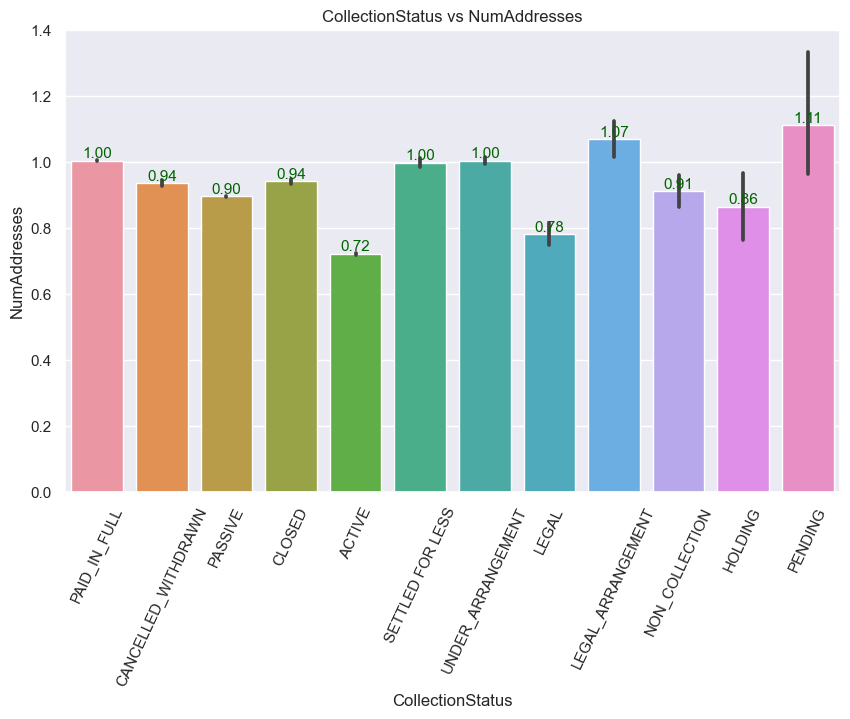

************************************************************************************************************************


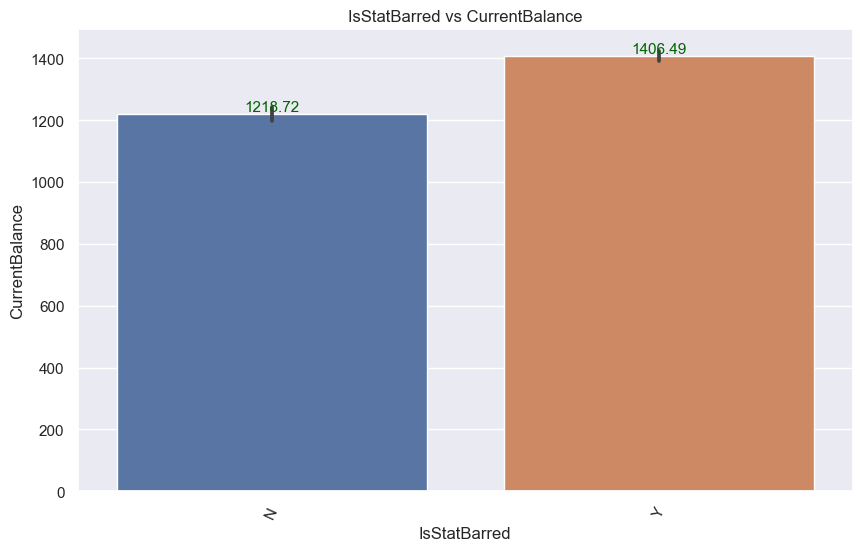

************************************************************************************************************************


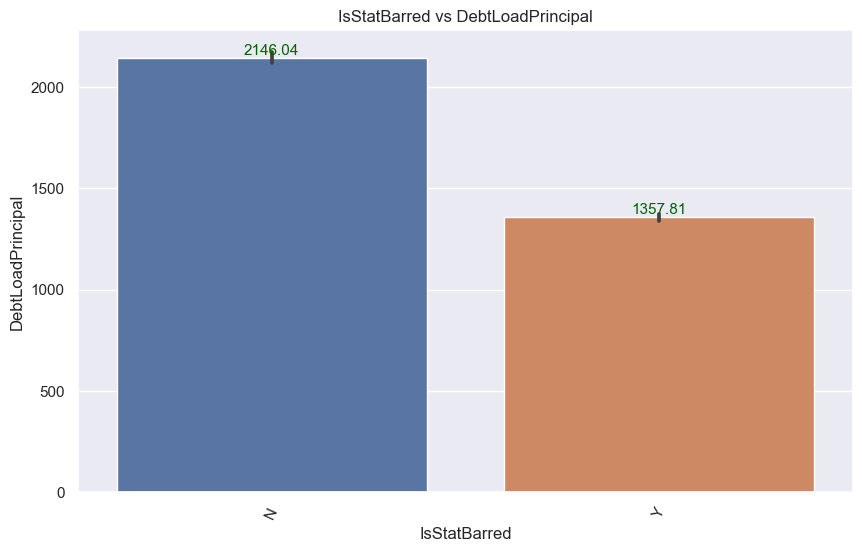

************************************************************************************************************************


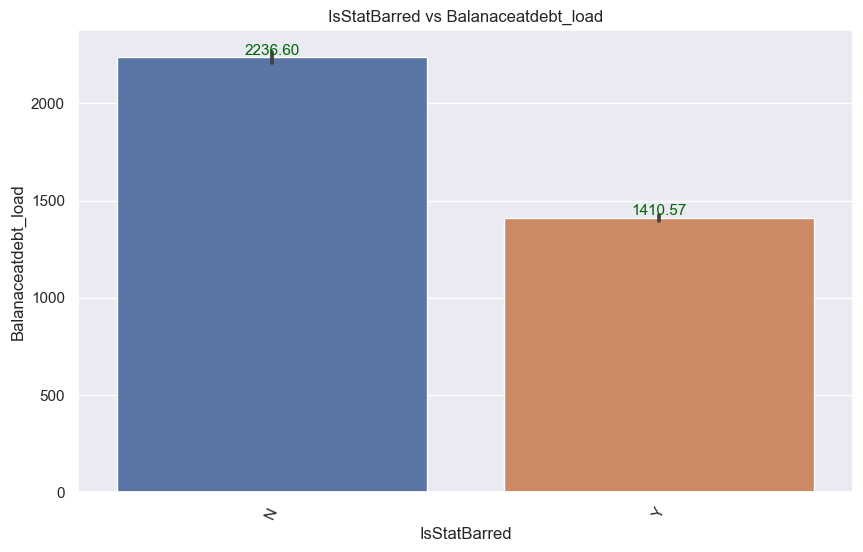

************************************************************************************************************************


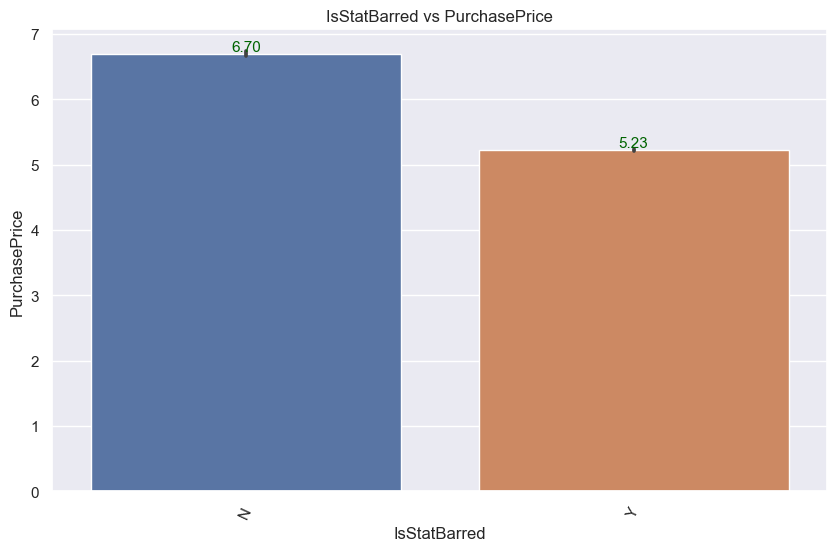

************************************************************************************************************************


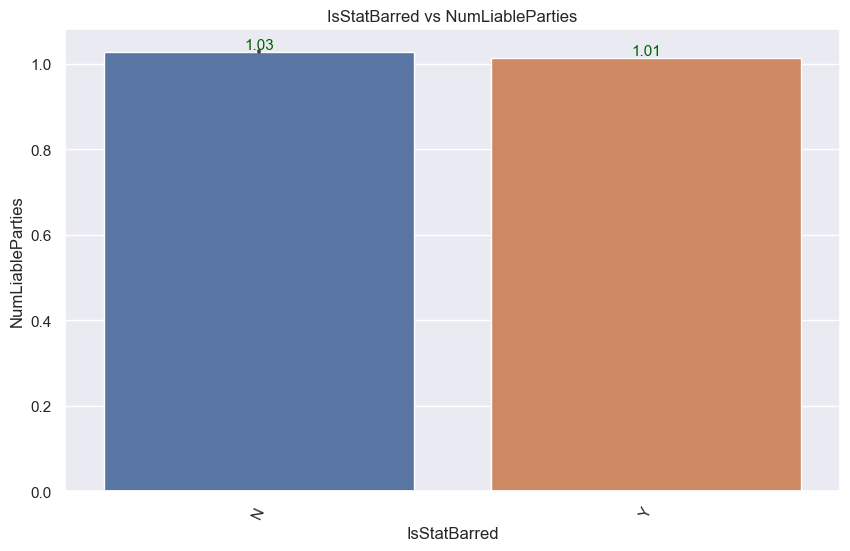

************************************************************************************************************************


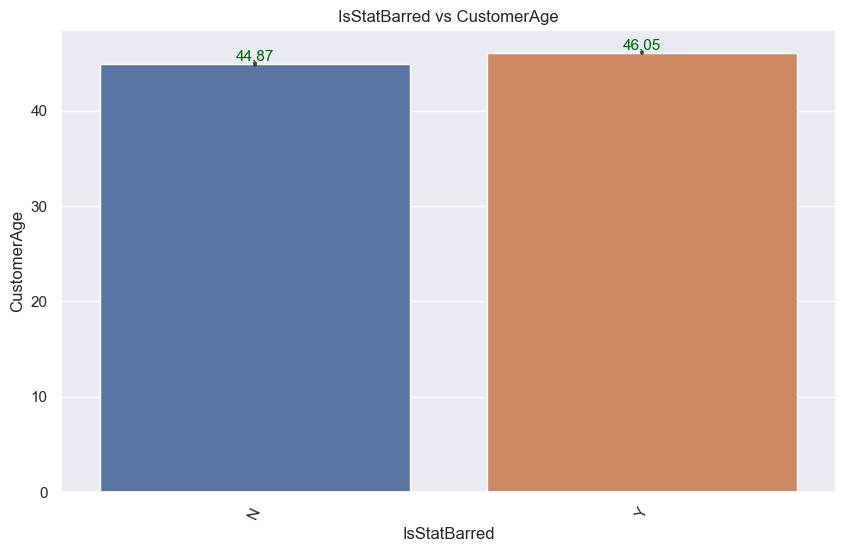

************************************************************************************************************************


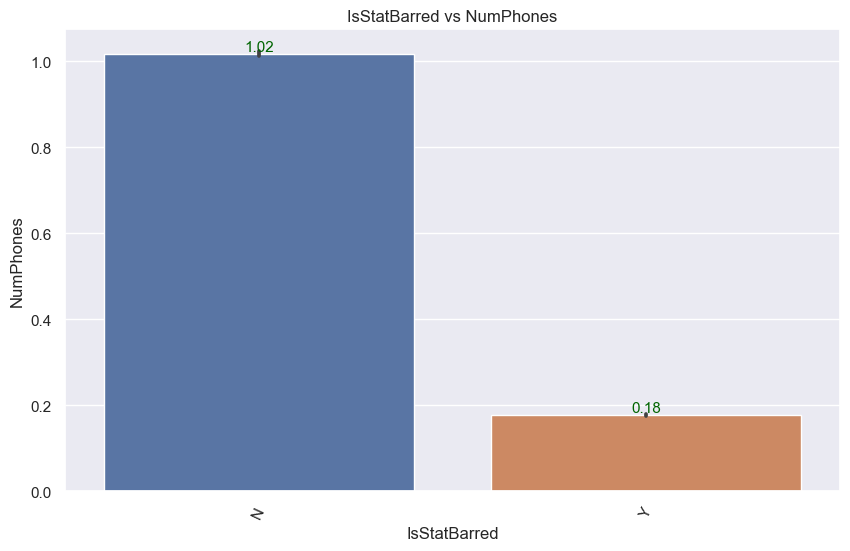

************************************************************************************************************************


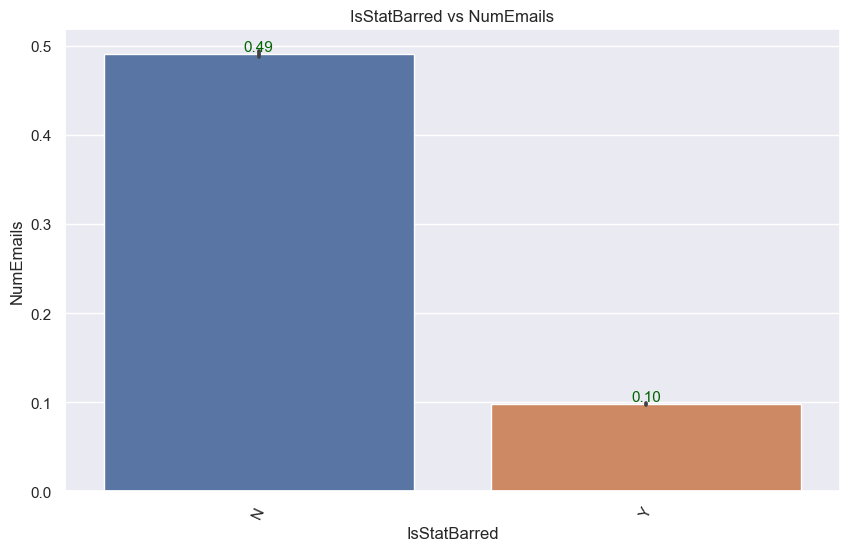

************************************************************************************************************************


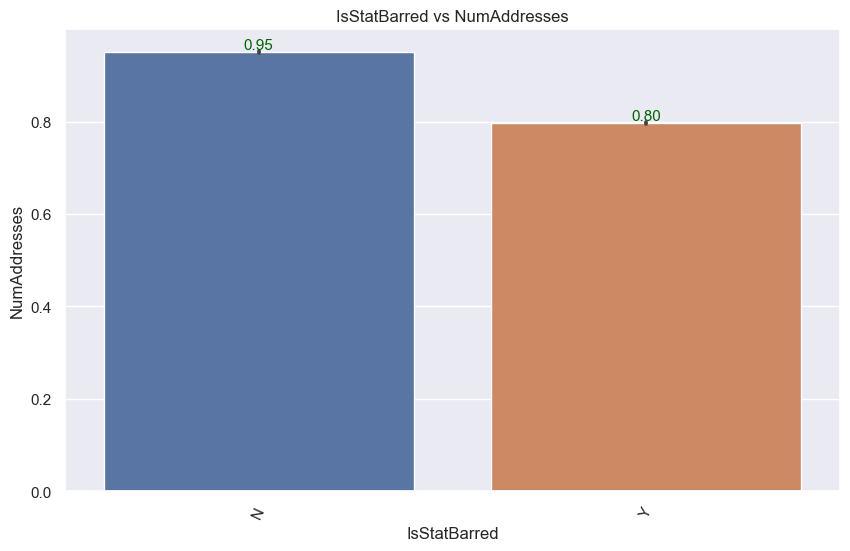

************************************************************************************************************************


In [41]:
# List of categorical columns
categorical_columns = ['ProductOrDebtType','CollectionStatus', 'IsStatBarred']

# List of numerical columns
numerical_columns = ['CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses']

# Iterate through each combination of categorical and numerical columns
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        # Create a bar plot with "mean" estimator
        ax = sns.barplot(x=cat_col, y=num_col, data=df, estimator=np.mean)
        # Add labels and title
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.title(f"{cat_col} vs {num_col}")
        # Rotate x-axis labels for better readability (if needed)
        plt.xticks(rotation=65)

        # Add labels to the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='darkgreen', xytext=(0, 5),
                        textcoords='offset points')

        plt.show()

        print("*" * 120)


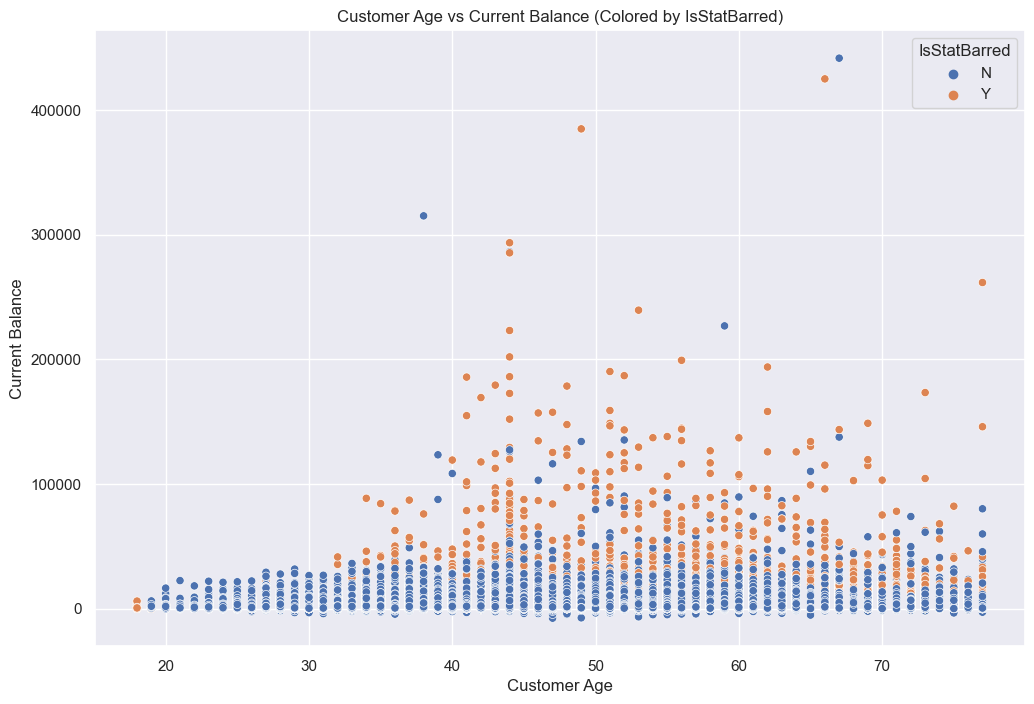

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['CustomerAge'], y=df['CurrentBalance'], hue=df['IsStatBarred'].astype('category'))
plt.xlabel('Customer Age')
plt.ylabel('Current Balance')
plt.title('Customer Age vs Current Balance (Colored by IsStatBarred)')
plt.legend(title='IsStatBarred')
plt.show()

In [43]:
#Load Data

df['CurrentBalance'] = np.log(df['CurrentBalance'] - df['CurrentBalance'].min() + 1)
df['DebtLoadPrincipal'] = np.log1p(df['DebtLoadPrincipal'])
df['Balanaceatdebt_load'] = np.log1p(df['Balanaceatdebt_load'])

In [44]:
# Calculate the frequency of each category
category_counts = df['OriginalCreditor_Redacted'].value_counts()

# Assign a value to each category based on its frequency
def frequency_encode(category):
    return category_counts[category] / len(df)

# Replace the original categorical values with the frequency encoded values
df['FrequencyEncodedCreditor'] = df['OriginalCreditor_Redacted'].apply(frequency_encode)

In [45]:
df[['OriginalCreditor_Redacted', 'FrequencyEncodedCreditor']]

OriginalCreditor_Redacted  FrequencyEncodedCreditor
0                     Creditor 1                  0.000020
1                     Creditor 2                  0.000015
2                     Creditor 1                  0.000020
3                     Creditor 2                  0.000015
4                     Creditor 1                  0.000020
...                          ...                       ...
406418               Creditor 50                  0.033886
406419               Creditor 50                  0.033886
406420               Creditor 50                  0.033886
406421               Creditor 50                  0.033886
406422               Creditor 50                  0.033886

[390666 rows x 2 columns]

In [46]:
#Encoding Categorical Data using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['ProductOrDebtType'] = le.fit_transform(df['ProductOrDebtType'])
df['CollectionStatus'] = le.fit_transform(df['CollectionStatus'])
df['IsStatBarred'] = le.fit_transform(df['IsStatBarred'])
df['InBankruptcy'] = le.fit_transform(df['InBankruptcy'])
df['IsLegal'] = le.fit_transform(df['IsLegal'])

In [47]:
df.head()

OriginalCreditor_Redacted  CurrentBalance  DebtLoadPrincipal  \
0                Creditor 1        8.951336           7.057209   
1                Creditor 2        8.974757           5.214392   
2                Creditor 1        8.951336           6.290773   
3                Creditor 2        9.680200           9.021659   
4                Creditor 1        8.951336           6.261492   

   Balanaceatdebt_load  PurchasePrice  ProductOrDebtType  CollectionStatus  \
0             7.057209           4.22                  5                 7   
1             5.214392           4.22                  5                 1   
2             6.290773           4.22                  5                 7   
3             9.021659           4.22                  5                 8   
4             6.261492           4.22                  5                 7   

   InBankruptcy  IsLegal  NumLiableParties  CustomerAge  NumPhones  NumEmails  \
0             0        1               1.0         53.0          0          0   
1             0        0               1.0         44.0          0          0   
2             0        0               1.0         44.0          1          0   
3             0        0               1.0         44.0          1          0   
4             0        1               1.0         46.0          2          0   

   NumAddresses  IsStatBarred  FrequencyEncodedCreditor  
0             1             0                  0.000020  
1             1             1                  0.000015  
2             1             0                  0.000020  
3             1             1                  0.000015  
4             1             1                  0.000020

In [48]:
#Data Preparation: Splitting Features and Target

x = df.drop(['IsStatBarred', 'OriginalCreditor_Redacted'], axis=1)
y = df['IsStatBarred']

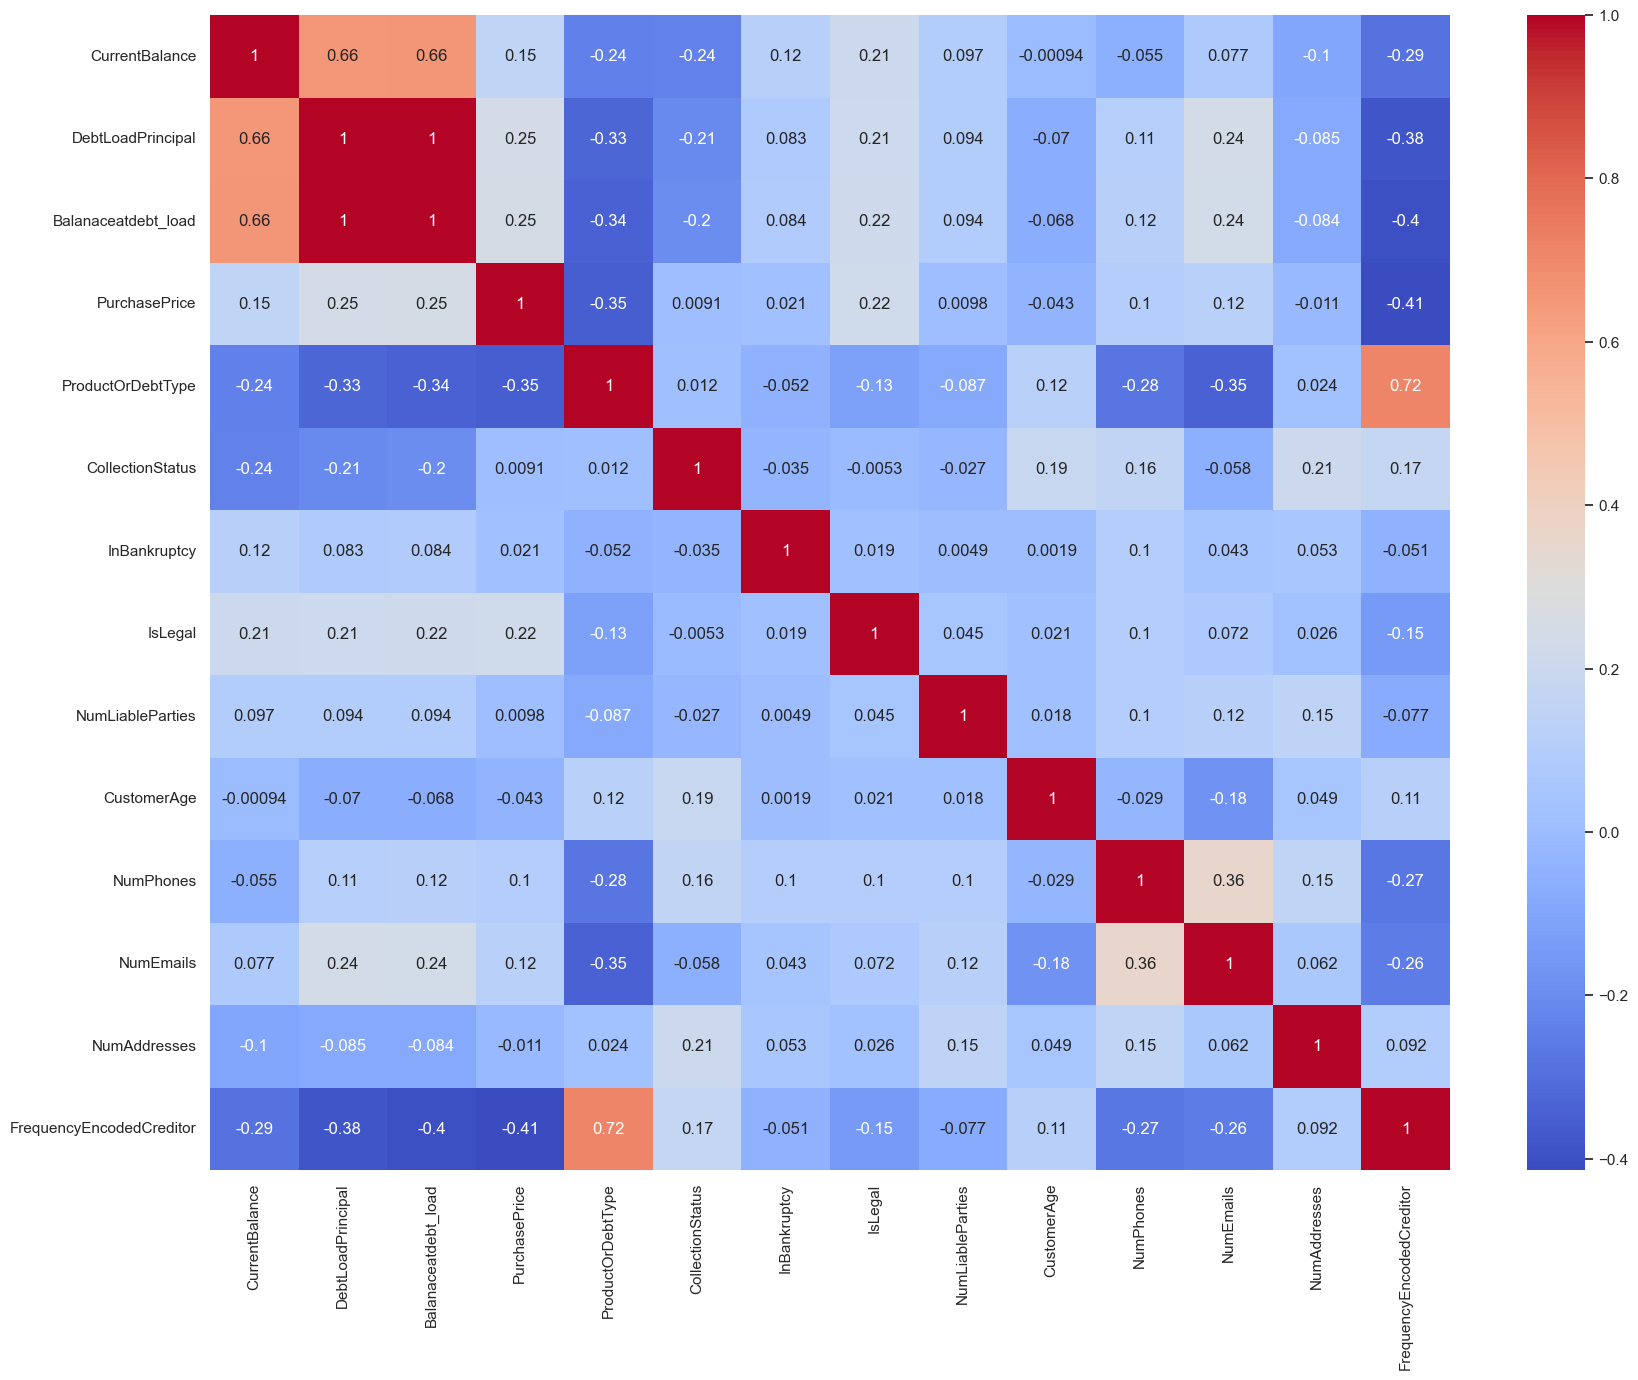

In [49]:
#Visualizing Feature Correlation with Heatmap

plt.figure(figsize=(20,15))
sns.heatmap(x.corr(),annot=True,cmap='coolwarm')
plt.show()

In [50]:
#Removing Feature BalanceAtDebtLoad

x = x.drop(['Balanaceatdebt_load'], axis=1)

In [51]:
#Standardizing Feature Data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [52]:
#Calculating Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_sc
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

vif                  Features
0   1.918003            CurrentBalance
1   2.017692         DebtLoadPrincipal
2   1.282174             PurchasePrice
3   2.272698         ProductOrDebtType
4   1.241792          CollectionStatus
5   1.032022              InBankruptcy
6   1.103474                   IsLegal
7   1.054938          NumLiableParties
8   1.081411               CustomerAge
9   1.335672                 NumPhones
10  1.320456                 NumEmails
11  1.106164              NumAddresses
12  2.456619  FrequencyEncodedCreditor

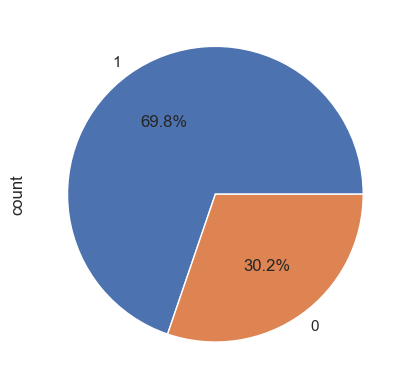

In [53]:
y.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [54]:
#Addressing Class Imbalance with SMOTE

import imblearn
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Perform SMOTE on the data
x_smote, y_smote = smote.fit_resample(x_sc, y)

# Print class distribution before and after SMOTE
print("Original class distribution:")
print(y.value_counts())
print("\nClass distribution after SMOTE:")
print(y_smote.value_counts())

Original class distribution:
IsStatBarred
1    272543
0    118123
Name: count, dtype: int64

Class distribution after SMOTE:
IsStatBarred
0    272543
1    272543
Name: count, dtype: int64


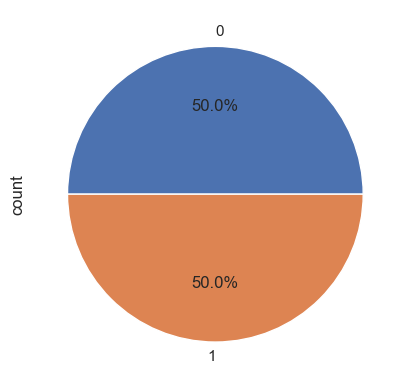

In [55]:
y_smote.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [56]:
#Splitting the data into Train and Test set
from sklearn.model_selection import train_test_split

# Assuming x_smote and y_smote are your feature and target variables
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(408814, 13)
(136272, 13)
(408814,)
(136272,)


In [58]:
#Importing Machine Learning Tools

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_val_score

In [59]:
#Model Evaluation and Comparison

algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

results_dataset = []

evaluation_results = []

for algorithm_name, model in algorithms.items():
    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, x_test, y_test, cv=5, scoring='accuracy')

    # Train the model on the entire training set
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Collect and print evaluation results
    results = {
        "Algorithm Name": algorithm_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1score,
        "AUC": roc_auc
    }

    print(f"Evaluation Results for {algorithm_name}:")
    for key, value in results.items():
        if isinstance(value, (int, float)):
            print(f"{key}: {value:.4f}")
        else:
            print(f"{key}:\n{value}")
    print("*" * 80)
    evaluation_results.append(results)


Evaluation Results for Logistic Regression:
Algorithm Name:
Logistic Regression
Train Accuracy: 0.8141
Test Accuracy: 0.8150
Precision: 0.7972
Recall: 0.8452
F1 Score: 0.8205
AUC: 0.8149
********************************************************************************
Evaluation Results for Gaussian Naive Bayes:
Algorithm Name:
Gaussian Naive Bayes
Train Accuracy: 0.7581
Test Accuracy: 0.7583
Precision: 0.7125
Recall: 0.8667
F1 Score: 0.7821
AUC: 0.7583
********************************************************************************
Evaluation Results for Decision Tree:
Algorithm Name:
Decision Tree
Train Accuracy: 1.0000
Test Accuracy: 0.9670
Precision: 0.9653
Recall: 0.9688
F1 Score: 0.9671
AUC: 0.9670
********************************************************************************
Evaluation Results for Random Forest:
Algorithm Name:
Random Forest
Train Accuracy: 0.9999
Test Accuracy: 0.9755
Precision: 0.9735
Recall: 0.9776
F1 Score: 0.9756
AUC: 0.9755
*******************************

Accuracy Score: 0.975600270048139
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     68099
           1       0.97      0.98      0.98     68173

    accuracy                           0.98    136272
   macro avg       0.98      0.98      0.98    136272
weighted avg       0.98      0.98      0.98    136272

--------------------------------------------------------------------------------
Confusion Matrix:


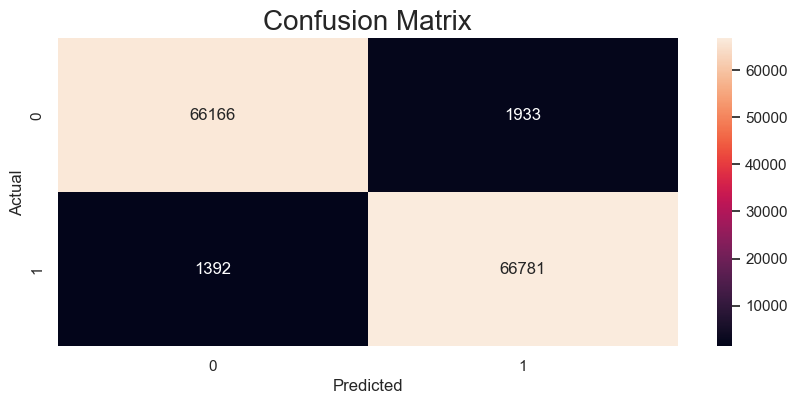

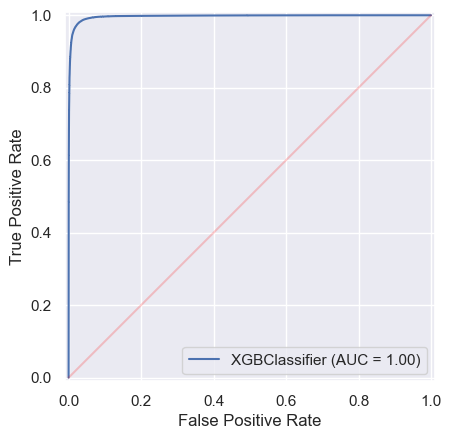

In [60]:
#Final Model
#Using XGBOOST and creating final model

from sklearn.metrics import confusion_matrix

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print('----'*20)
print(f"Classification Report\n {classification_report(y_test, y_pred)}")
print('----'*20)
print(f"Confusion Matrix:")
plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f');
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix', fontsize=20)
plt.show()
# Roc, AUC score
y_score1 = xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name="XGBClassifier")

display.plot()
plt.plot(np.linspace(0,1),np.linspace(0,1), color="red", alpha=0.2)
plt.show()

In [ ]:
L = [5,5,1,1,2,2,3,4,5,67,67,88,88,99,90,90]

#sort n remove duplicates